**Introduction:**

Peer-to-peer (P2P) lending represents an innovative method of peer-to-peer money lending, facilitated through online platforms. This study employs real-world data obtained from "Lending Club," an American-based company, to predict credit solvency(Binary Classification) using various predictive models and techniques, including Lasso, Ridge, Elastic-Net, Logistic Regression, Extreme Gradient Boosting, and Bayesian Additive Regression Trees (BART). Through an economic evaluation of the context and the results obtained from the models, this study aims to draw conclusions regarding credit risk assessment in the P2P lending market.

The original data set is large: 1.6 GB csv file. It was scraped from the Lending Club website by some guy on github.
We downloaded it from kaggle:
 https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 150

In [2]:
path= "C:\\Users\\giuse\\OneDrive\\Desktop\\uni venezia\\terzo periodo\\models and technologies for the financial industry\\lending_club_large\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(path, low_memory = False)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [3]:


#selecting the variables of our interest
cols_to_keep = [
    "annual_inc","application_type","dti","earliest_cr_line","emp_length","fico_range_high","fico_range_low","grade",
    "home_ownership","inq_last_6mths","installment","int_rate","issue_d","loan_amnt","loan_status","mo_sin_rcnt_tl",
    "mort_acc","mths_since_recent_bc","disbursement_method","verification_status","term","tax_liens","sub_grade",
    "purpose","pub_rec_bankruptcies","percent_bc_gt_75","num_bc_tl","num_actv_rev_tl","num_actv_bc_tl","num_accts_ever_120_pd",
    "acc_now_delinq","acc_open_past_24mths","open_acc","pct_tl_nvr_dlq","pub_rec","total_acc","total_bal_ex_mort"
]

df = df[cols_to_keep]
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)



Most of the columns we removed had NAs on a large portion of the dataset.
Also some columns already contained information on the loan default

The features we kept have information on the borrower's income, employment, previous credit history, on the loan interest, purpose, duration.

The loan_status variable is the target feature of our analysis

In [4]:
df.loan_status.value_counts()

loan_status
Fully Paid            953502
Current               803484
Charged Off           234903
Late (31-120 days)     19341
In Grace Period         7745
Late (16-30 days)       3853
Default                   33
Name: count, dtype: int64

We need to group it into two classes: default = 1 and default = 0

Also we will drop current loans, since at the time the data was scraped from Lending Club website it wasn't known if the loan defaulted or not.

In [5]:
df = df[df.loan_status != "Current"] #dropping current loans

default_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
loan_status_dummy = df.loan_status.isin(default_categories)
loan_status_dummy = loan_status_dummy.astype("uint8")
df.loan_status = loan_status_dummy

df.reset_index(inplace = True, drop = True)

## Variables' descriptions

In [6]:
pd.set_option("display.max_rows",300)
description =  pd.read_csv("description_col.csv",index_col="Nome_Variabile")
description

,Descrizione,Data_Type
Nome_Variabile,,
annual_inc,The combined self-reported annual income provi...,float64
application_type,Indicates whether the loan is an individual ap...,object
dti,A ratio calculated using the co-borrowers' tot...,float64
earliest_cr_line,Earliest credit line at time of application f...,object
emp_length,Employment length in years. Possible values ar...,object
fico_range_high,The upper boundary range the borrower’s FICO a...,float64
fico_range_low,The lower boundary range the borrower’s FICO a...,float64
grade,LC assigned loan grade,object
home_ownership,The home ownership status provided by the borr...,object


## Data visualisation


We will start with numeric, continuous variables

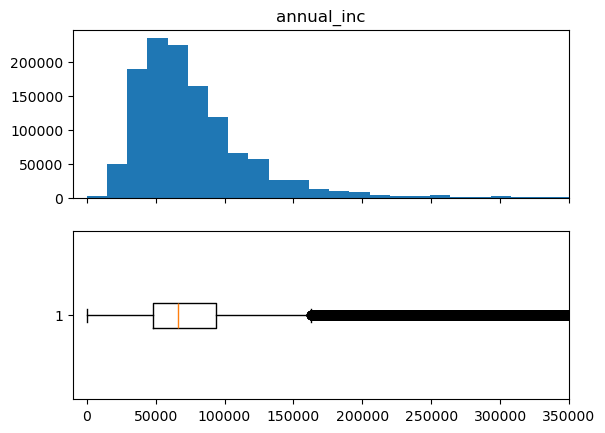

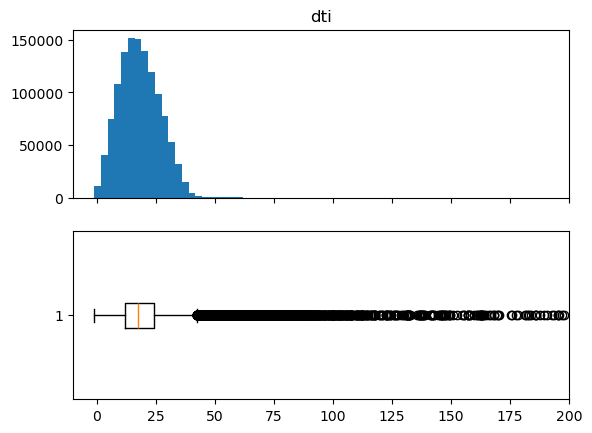

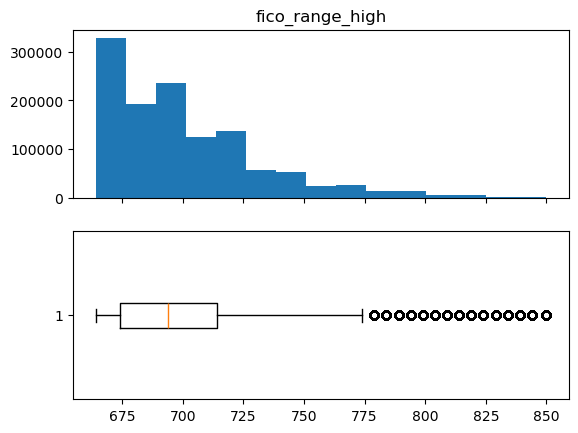

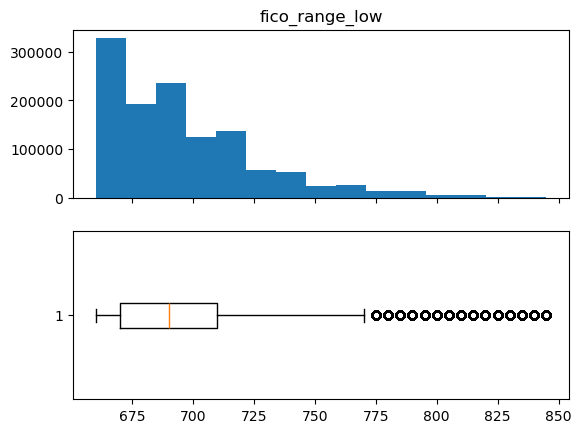

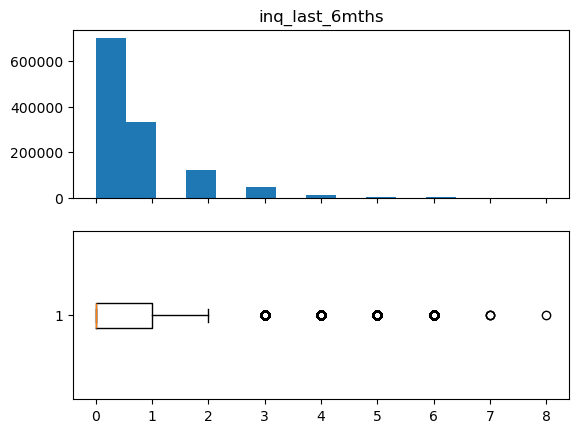

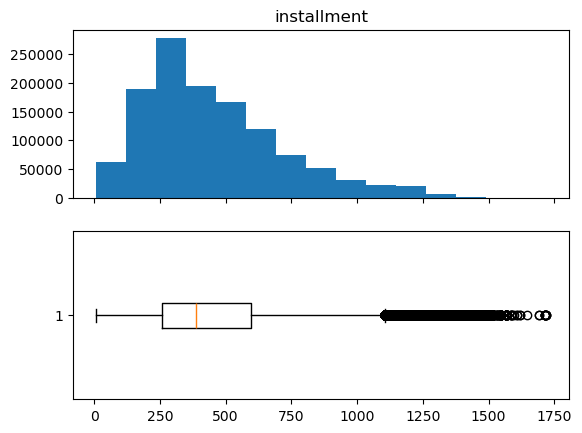

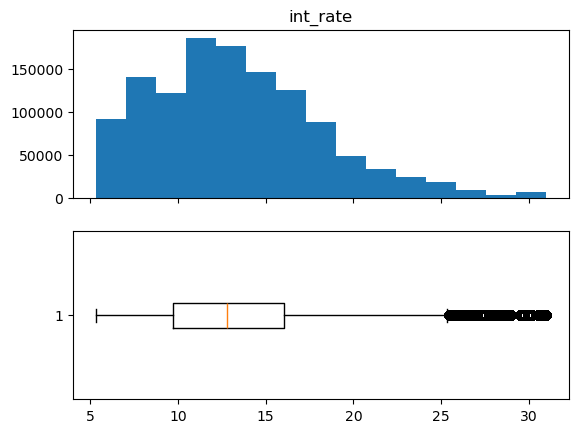

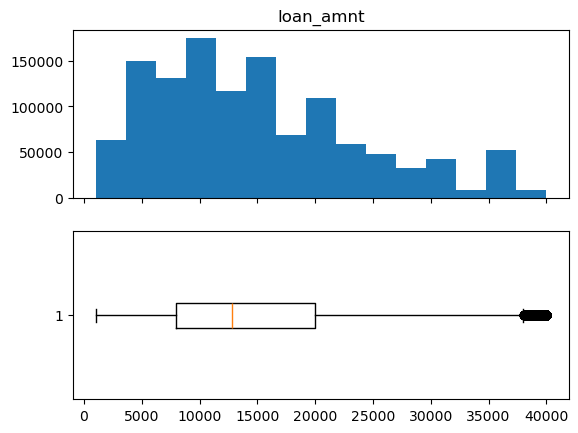

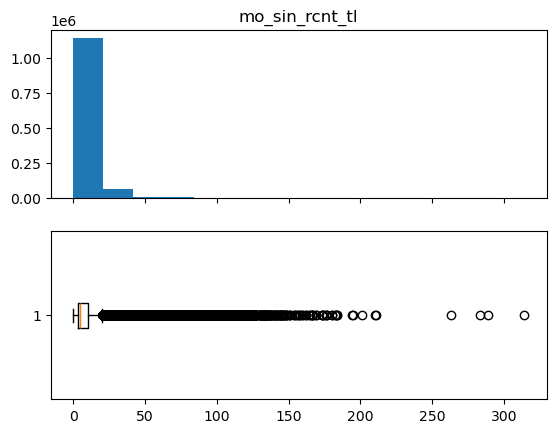

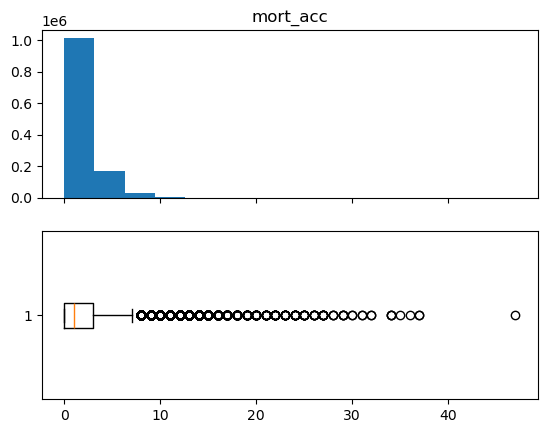

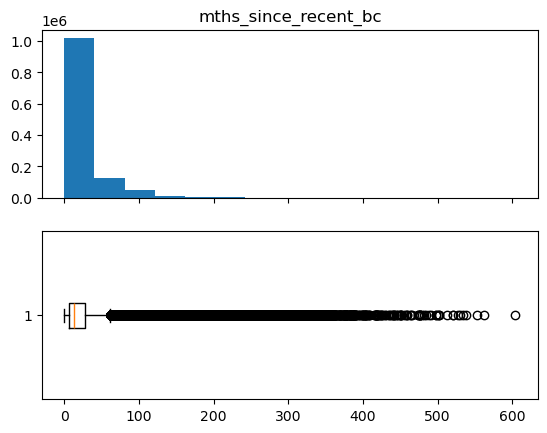

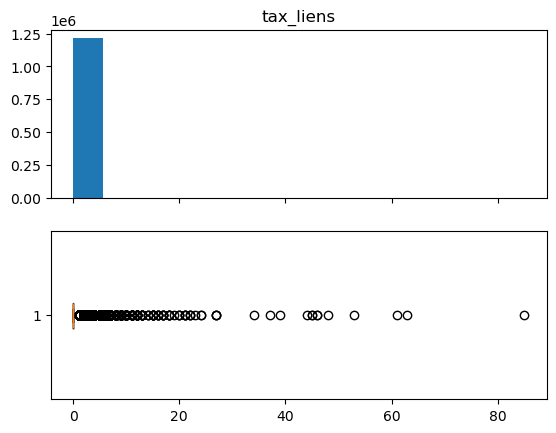

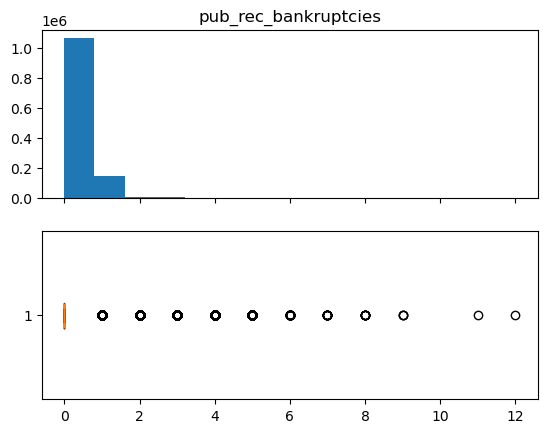

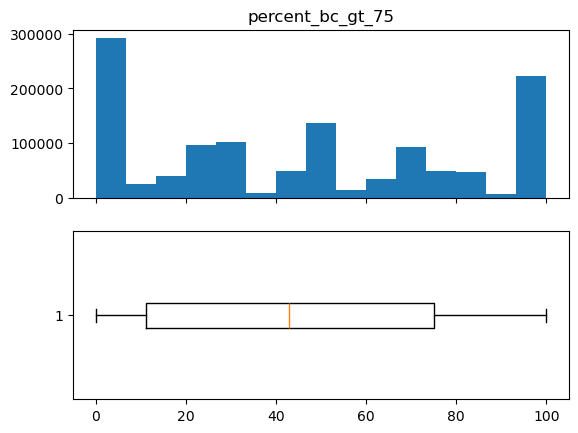

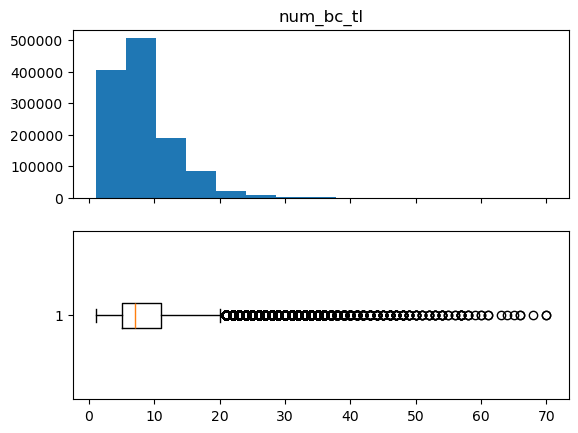

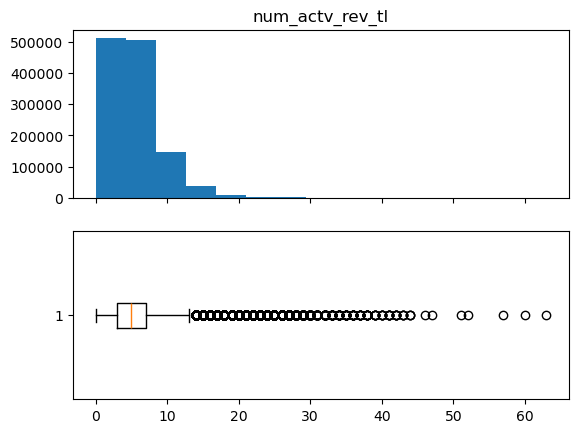

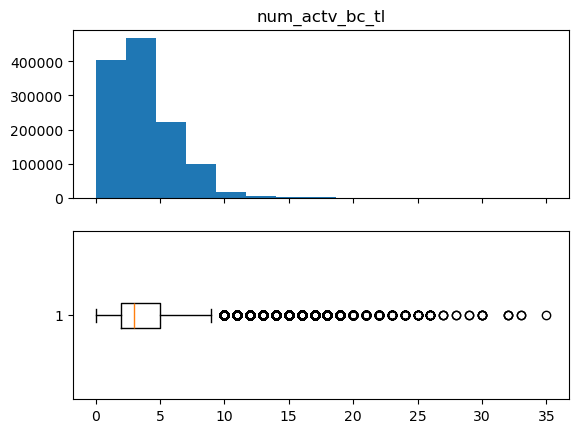

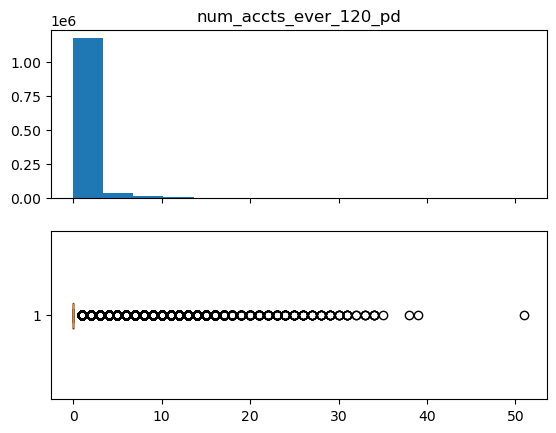

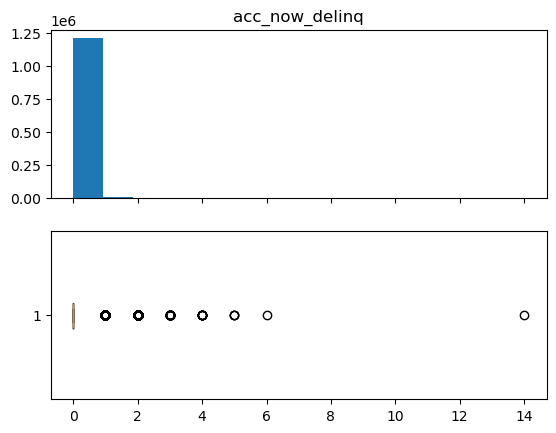

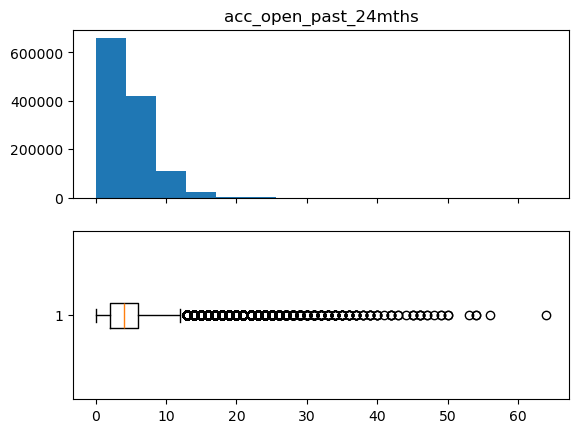

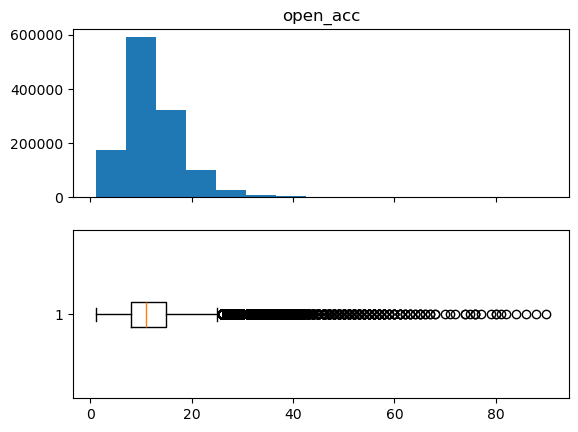

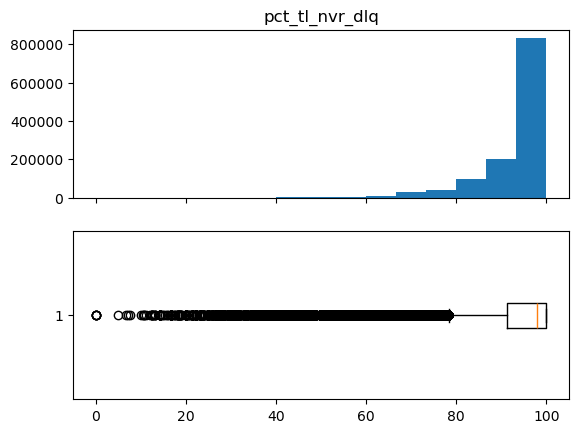

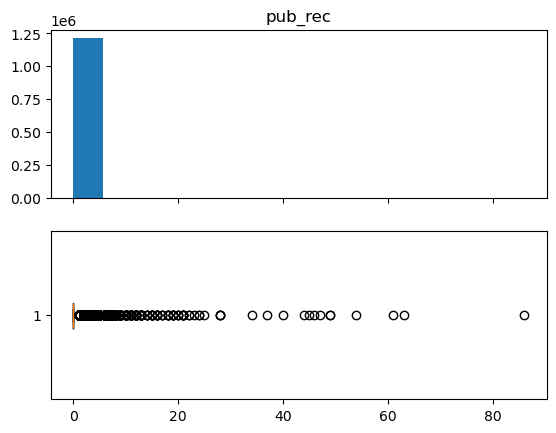

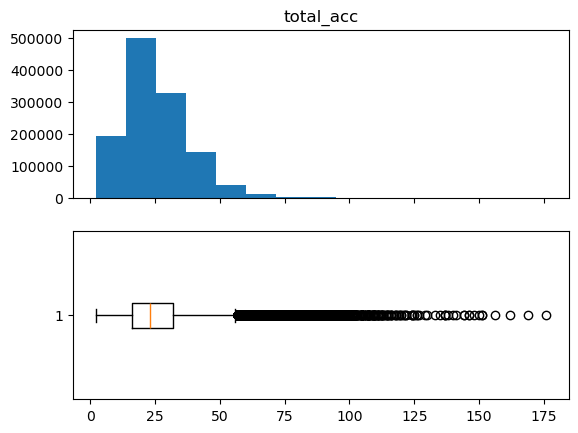

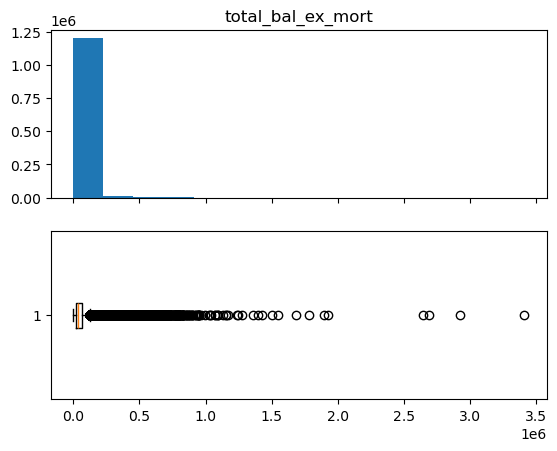

In [7]:
numeric_vars = df.columns[df.dtypes == "float64"]

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(df["annual_inc"], bins = 750)
ax2.boxplot(df["annual_inc"], vert = False)
ax1.set_title("annual_inc")
ax1.set_xlim(-10000, 350000)
ax2.set_xlim(-10000, 350000)
plt.show()

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(df["dti"], bins = 350)
ax2.boxplot(df["dti"], vert = False)
ax1.set_title("dti")
ax1.set_xlim(-10, 200)
ax2.set_xlim(-10, 200)
plt.show()

for var in numeric_vars:
    if var not in ["annual_inc","dti"]:
        fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
        ax1.hist(df[var], bins = 15)
        ax2.boxplot(df[var], vert = False)
        ax1.set_title(var)
        plt.show()

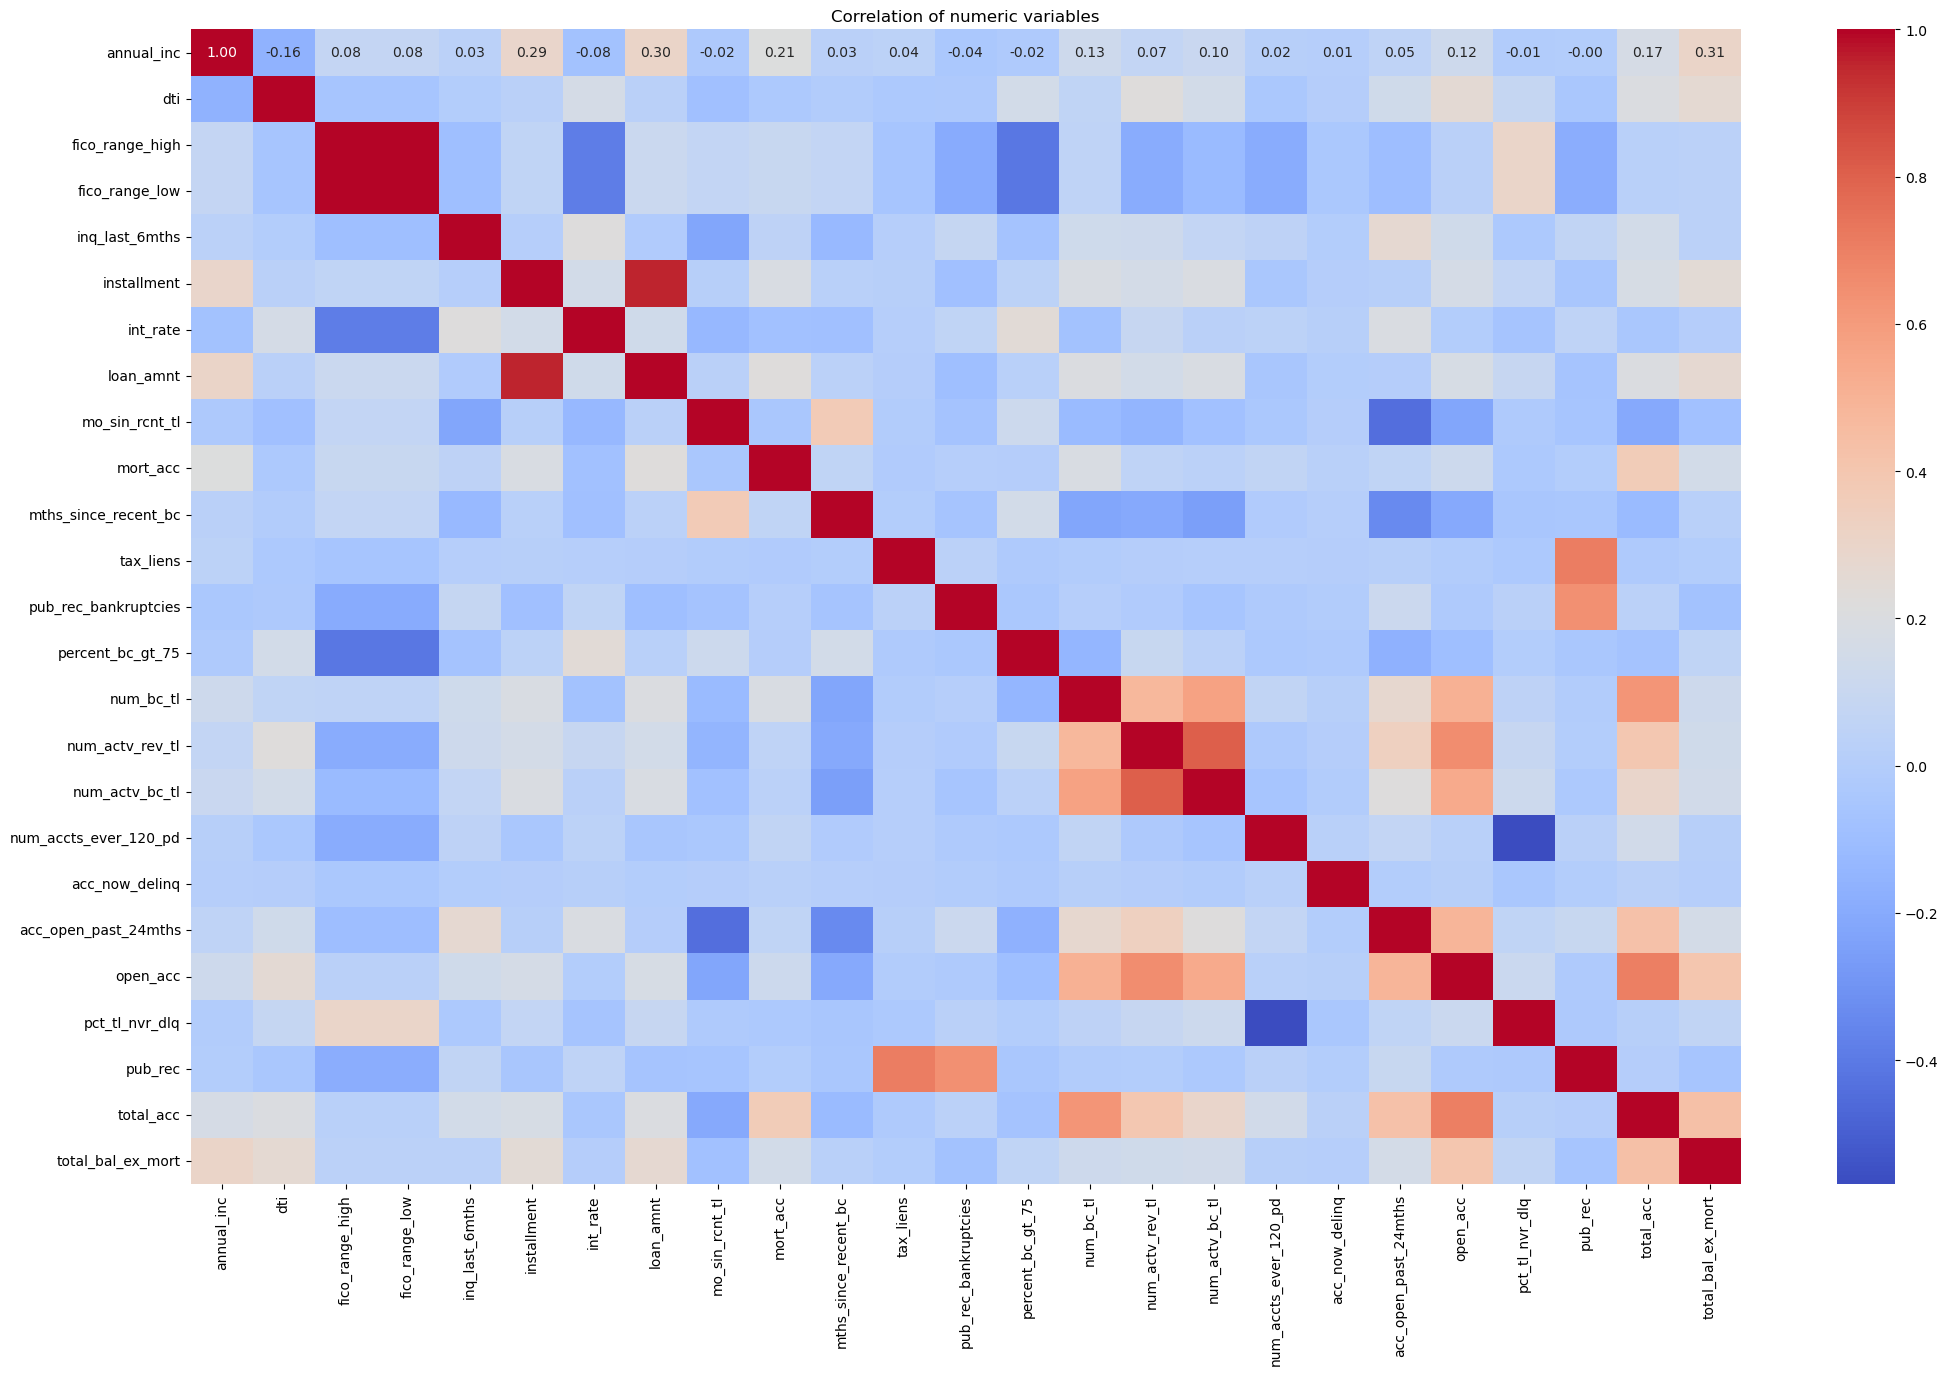

In [8]:
correlation_matrix = df[numeric_vars].corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation of numeric variables")
plt.show()

We can see that there are some variables that are highly correlated and just provide the same information: FICO range high and FICO range low; loan amount and installment. Regularization techinques will help dealing with this problem

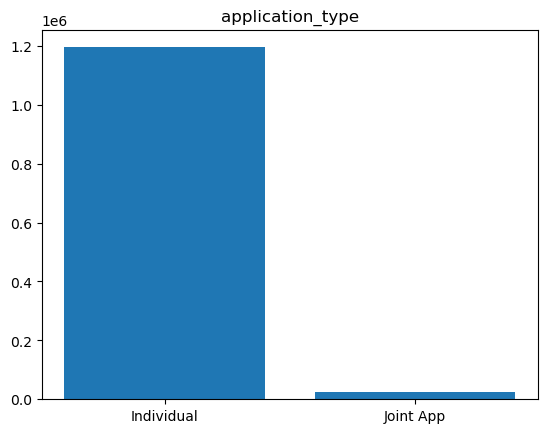

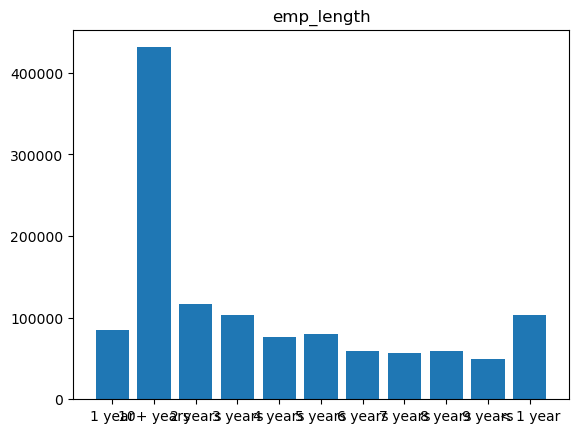

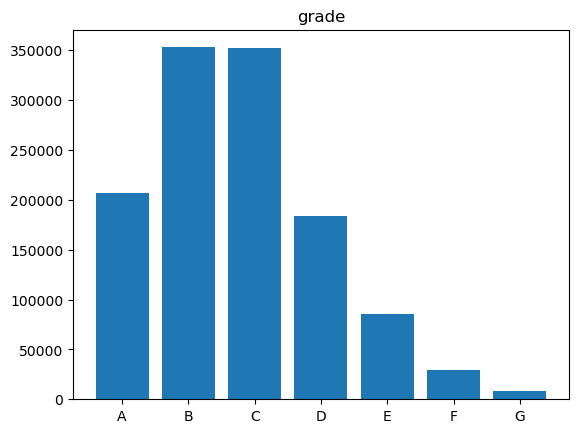

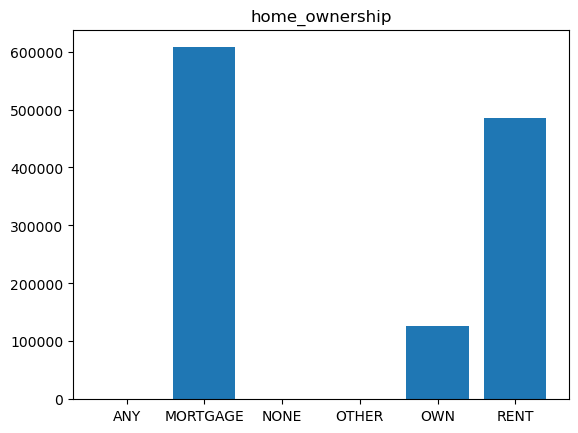

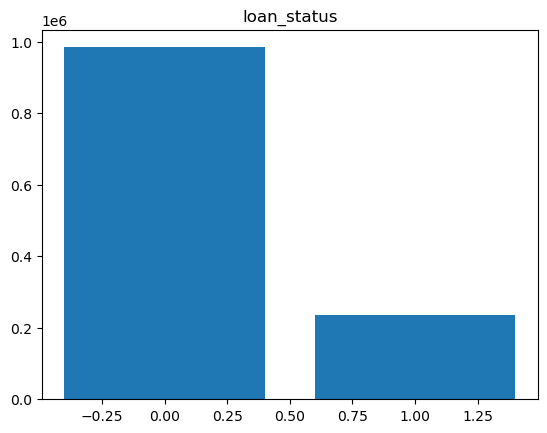

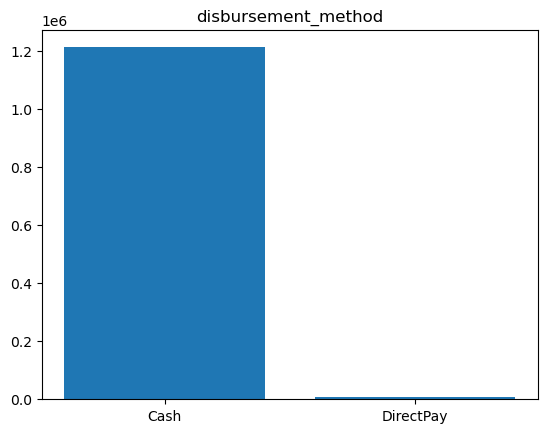

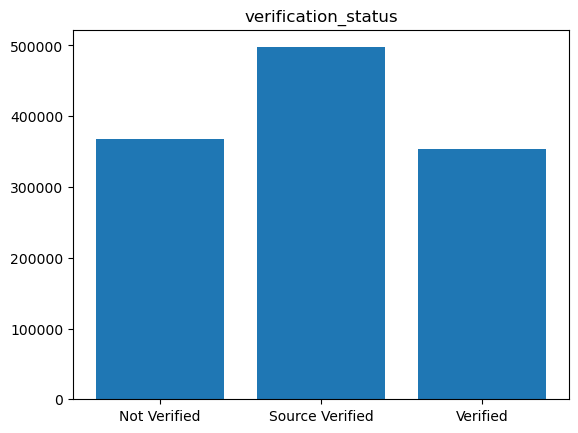

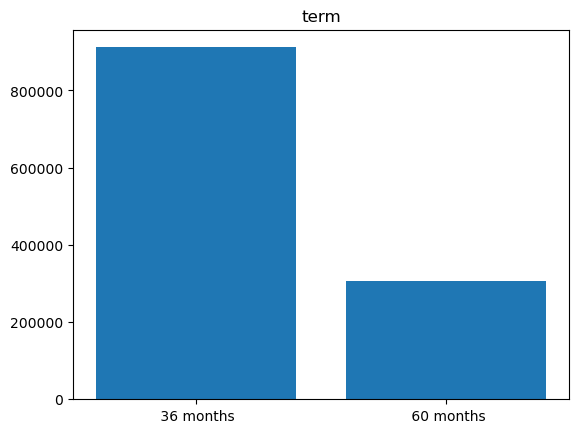

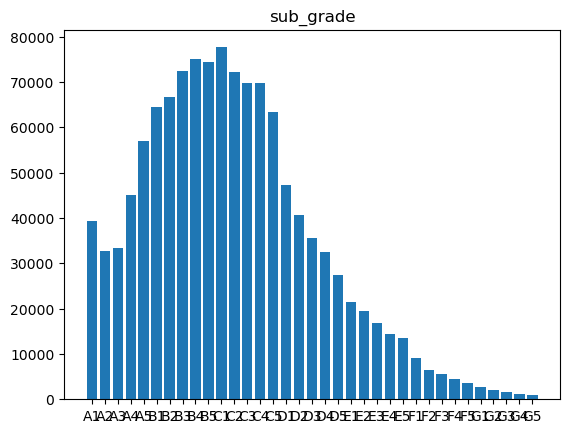

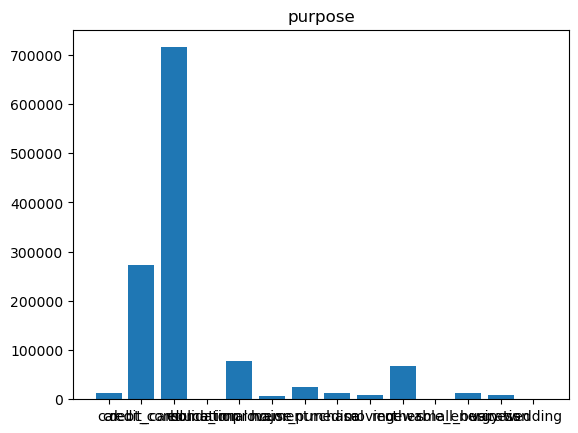

In [9]:
categorical_vars = df.columns[df.dtypes != "float64"]

for var in categorical_vars:
    if var not in ["earliest_cr_line", "issue_d"]:
        data = df[var].groupby(df[var]).count()
        plt.bar(x = data.index, height= data.to_numpy())
        plt.title(var)
        plt.show()

Again we see that some features contain the same information: Grade and Subgrade.

We will need to transform the categorical variables to numeric ones.


In [10]:
from sklearn.preprocessing import OrdinalEncoder

term_dummies = pd.get_dummies(df.term,prefix= "term")
df = pd.concat([df, term_dummies], axis = 1)
df.drop(columns = ["term",'term_ 36 months'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop 36 months since it is the highest frequency class

#subgrade
enc = OrdinalEncoder()
sub_grade_encoded = pd.Series(enc.fit_transform(df.sub_grade.array.reshape(-1,1)).flatten())
sub_grade_encoded = sub_grade_encoded*-1 # we invert the rating: highest grade has the highest number
df.sub_grade = sub_grade_encoded

#grade
enc = OrdinalEncoder()
grade_encoded = pd.Series(enc.fit_transform(df.grade.array.reshape(-1,1)).flatten())
grade_encoded = grade_encoded*-1 # we invert the rating: highest grade has the highest number
df.grade = grade_encoded

#home ownership
# we will first collapse some classes into one: any, none and other will be grouped together
df.home_ownership[df.home_ownership == "ANY"] = "OTHER"
df.home_ownership[df.home_ownership == "NONE"] = "OTHER"

home_ownership_dummies = pd.get_dummies(df.home_ownership,prefix= "home_ownership")
df = pd.concat([df, home_ownership_dummies], axis = 1)
df.drop(columns = ["home_ownership",'home_ownership_MORTGAGE'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop MORTGAGE since it is the highest frequency class

# verification status
verification_status_dummies = pd.get_dummies(df.verification_status,prefix= "verification_status")
df = pd.concat([df, verification_status_dummies], axis = 1)
df.drop(columns = ["verification_status",'verification_status_Source Verified'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop Source Verified since it is the highest frequency class

#purpose
# first we group educational with other because there is only one instance of it
df.purpose[df.purpose == "educational"] = "other"
purpose_dummies = pd.get_dummies(df.purpose,prefix= "purpose")
df = pd.concat([df, purpose_dummies], axis = 1)
df.drop(columns = ["purpose",'purpose_debt_consolidation'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop educational because there is only one value

#application_type
application_type_dummies = pd.get_dummies(df.application_type,prefix= "application_type")
df = pd.concat([df, application_type_dummies], axis = 1)
df.drop(columns = ["application_type",'application_type_Individual'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop application_type since it is the highest frequency class

# disbursement_method
disbursement_method_dummies = pd.get_dummies(df.disbursement_method,prefix= "disbursement_method")
df = pd.concat([df, disbursement_method_dummies], axis = 1)
df.drop(columns = ["disbursement_method",'disbursement_method_Cash'],inplace = True)
#we need to drop one class to avoid perfect collinearity
# we will drop Cash since it is the highest frequency class

#emp_length
emp_length_map = {
    "1 year": 1,
    "10+ years":10,
    "2 years":2,
    "3 years":3,
    "4 years":4,
    "5 years":5,
    "6 years":6,
    "7 years":7,
    "8 years":8,
    "9 years":9,
    "< 1 year" : 0
}

df.emp_length = df.emp_length.map(emp_length_map)



C:\Users\giuse\AppData\Local\Temp\ipykernel_3552\934061891.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.home_ownership[df.home_ownership == "ANY"] = "OTHER"
C:\Users\giuse\AppData\Local\Temp\ipykernel_3552\934061891.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.home_ownership[df.home_ownership == "NONE"] = "OTHER"
C:\Users\giuse\AppData\Local\Temp\ipykernel_3552\934061891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

We also have the variables Issue date and Earliest credit line that are a timestamp. We will encode it with an integer number, setting 0 for the earliest date and the highest number for the latest date

In [11]:
#earliest_credit_line
enc = OrdinalEncoder()
earliest_cr_line_encoded = pd.Series(enc.fit_transform(pd.to_datetime(df.earliest_cr_line, format = "%b-%Y").array.reshape(-1,1)).flatten())
df.earliest_cr_line = earliest_cr_line_encoded

#issue_date
enc = OrdinalEncoder()
issue_d_encoded = pd.Series(enc.fit_transform(pd.to_datetime(df.issue_d, format = "%b-%Y").array.reshape(-1,1)).flatten())
df.issue_d = issue_d_encoded

In [12]:
df.isna().sum().sum()

0

We now plot the variables' distributions according to class of target variable.

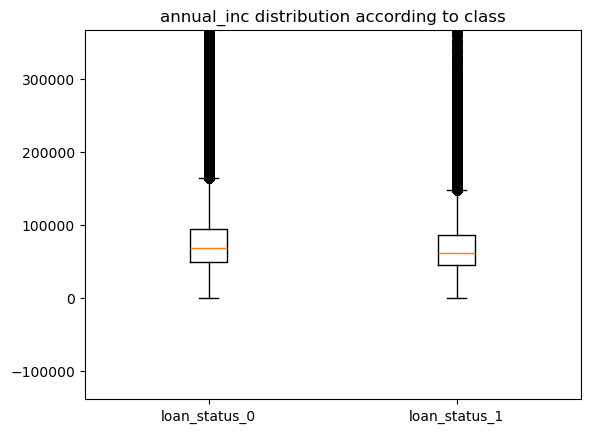

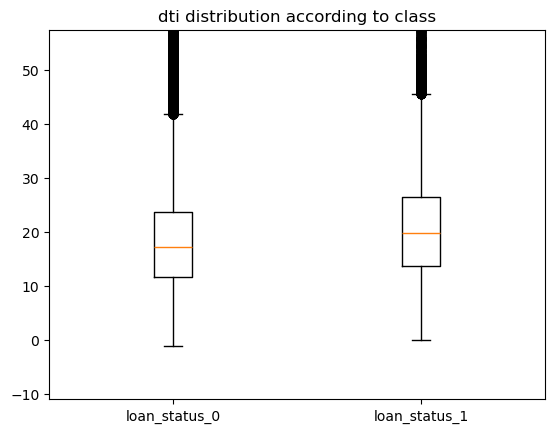

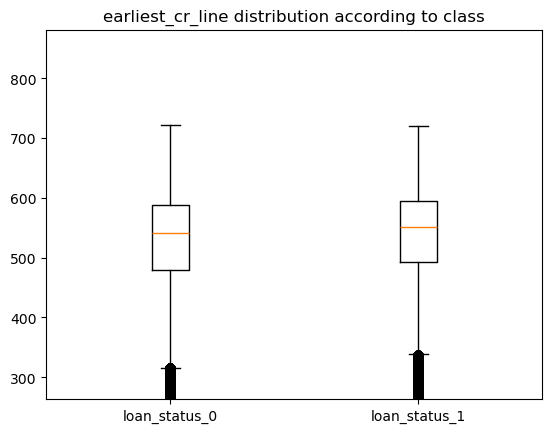

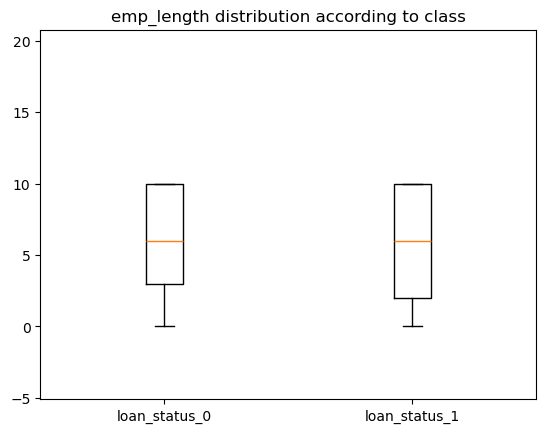

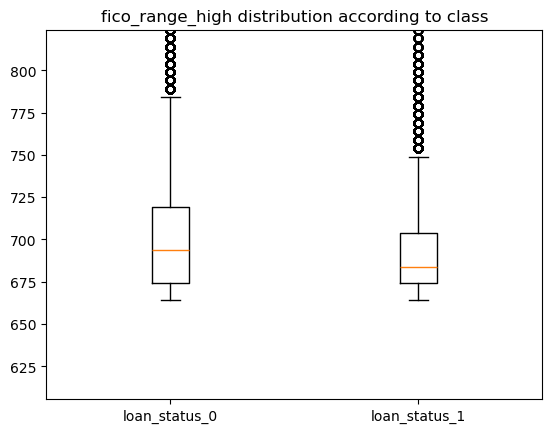

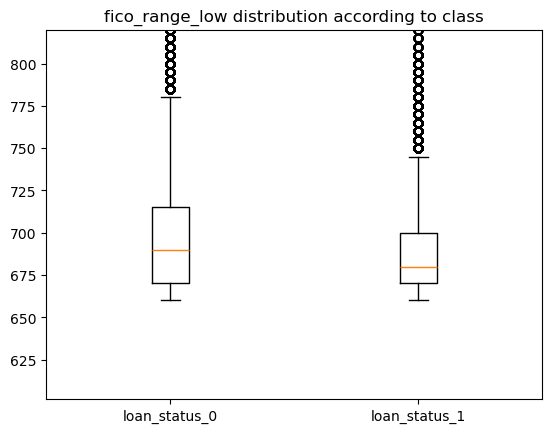

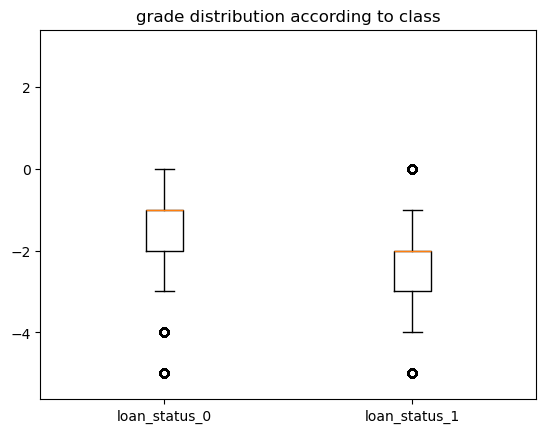

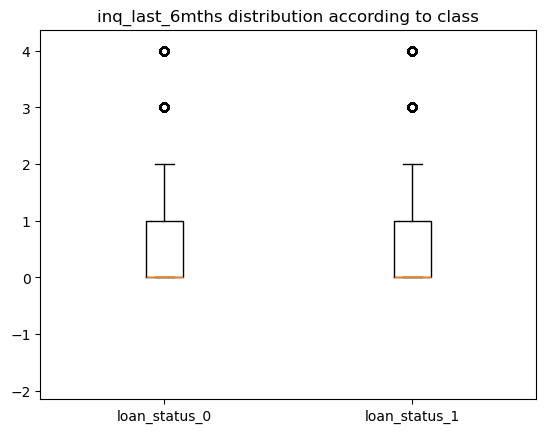

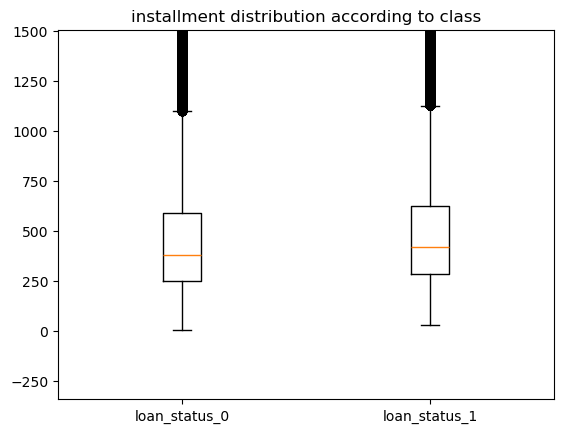

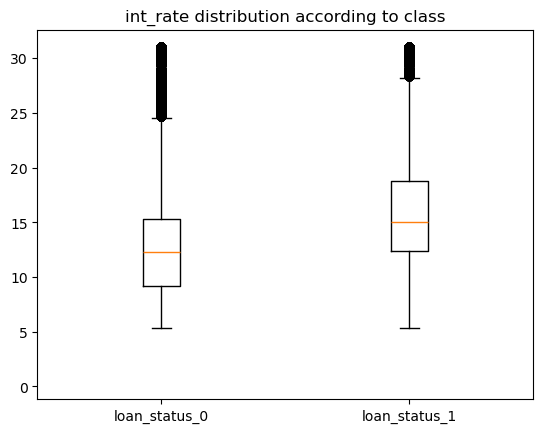

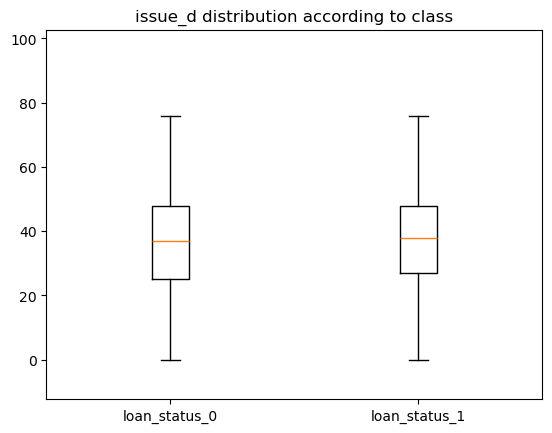

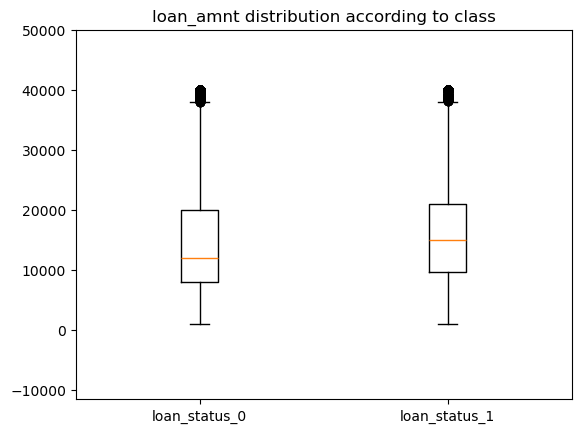

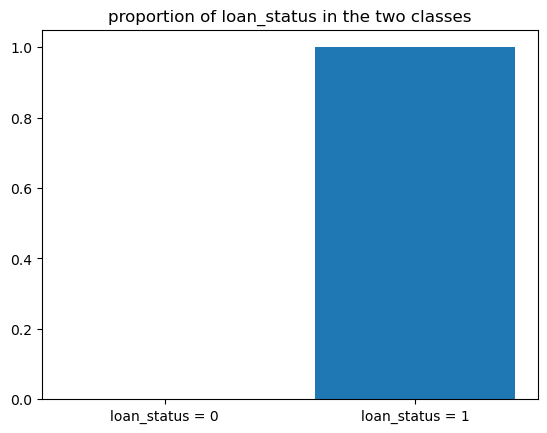

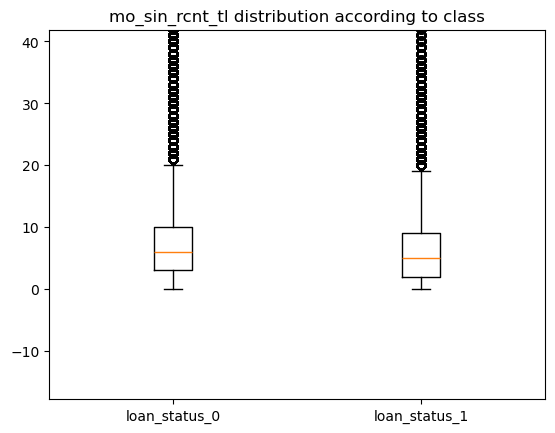

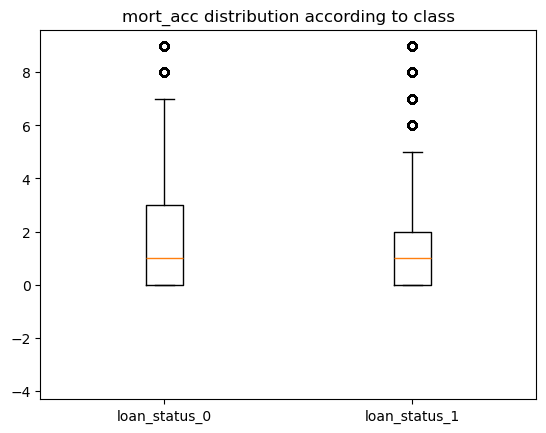

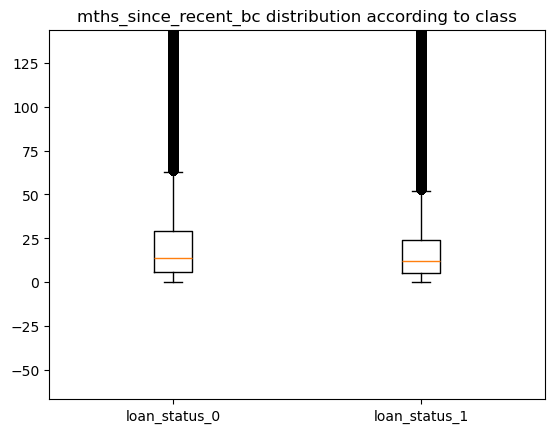

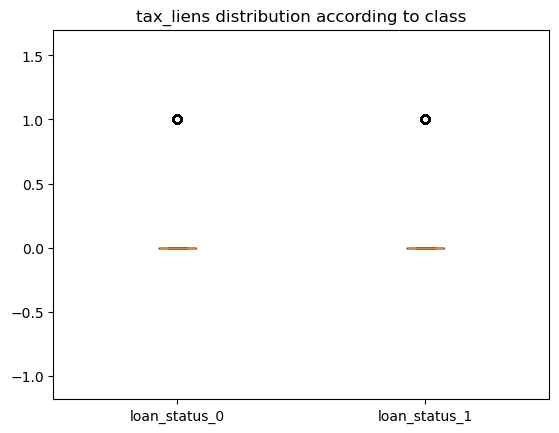

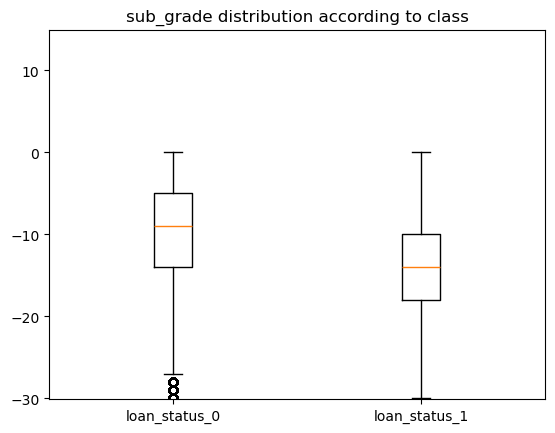

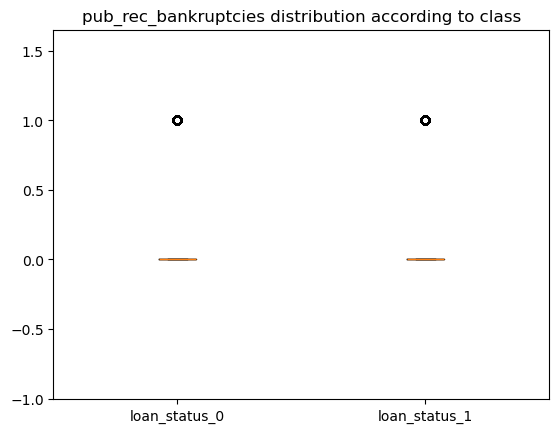

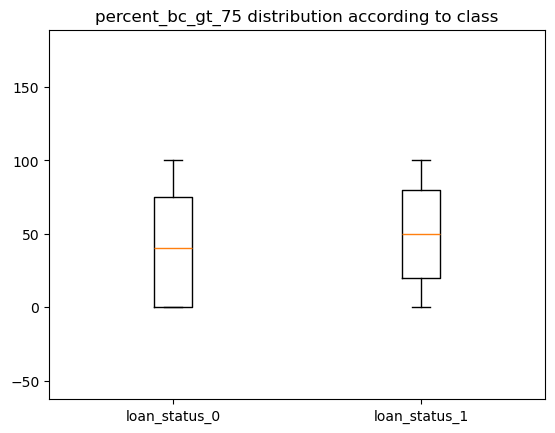

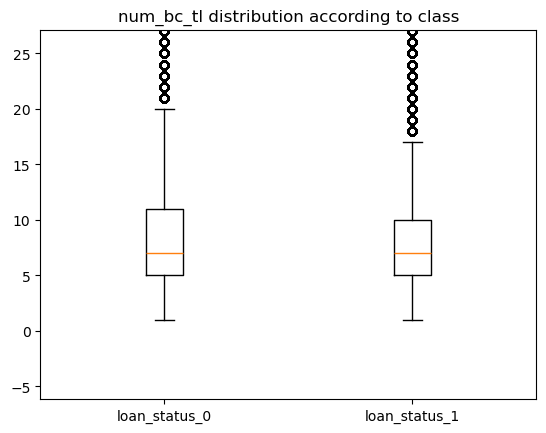

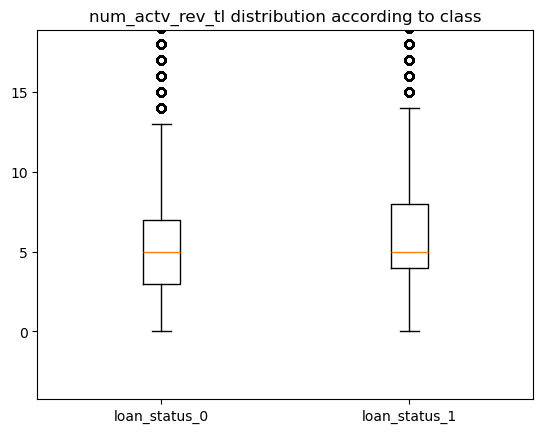

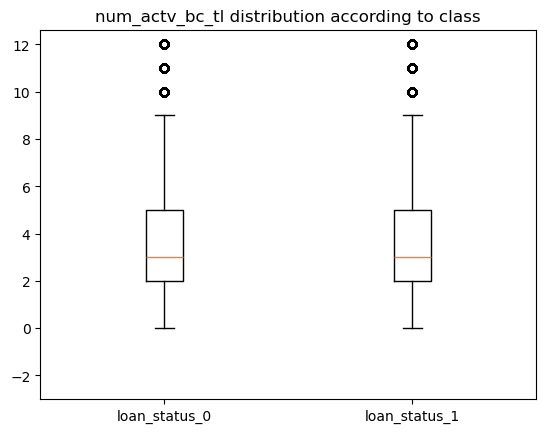

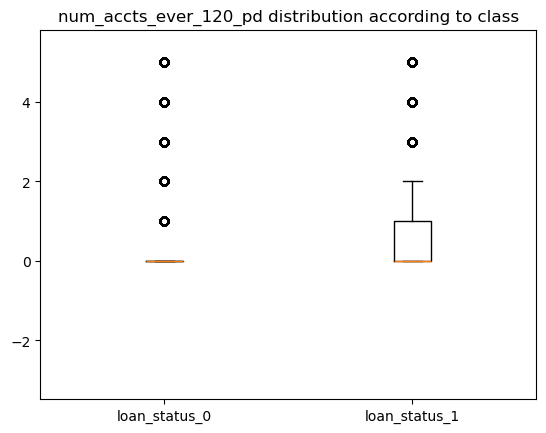

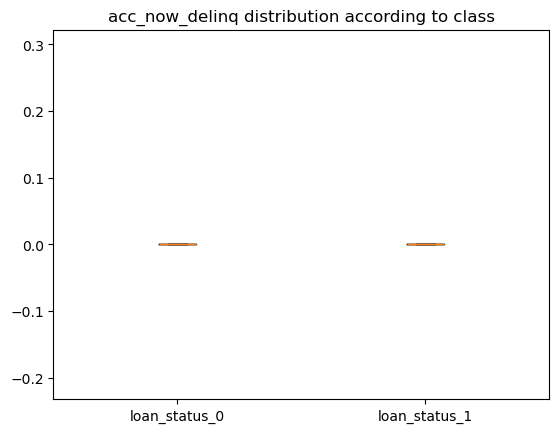

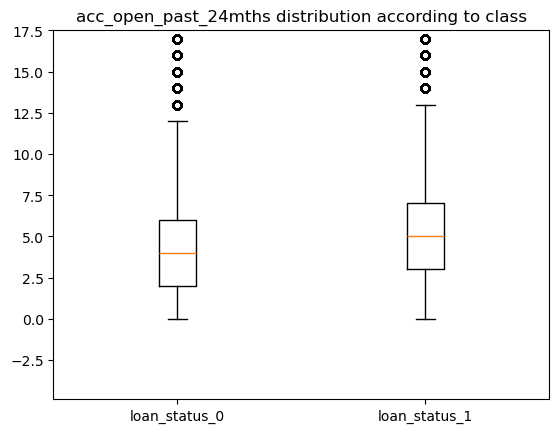

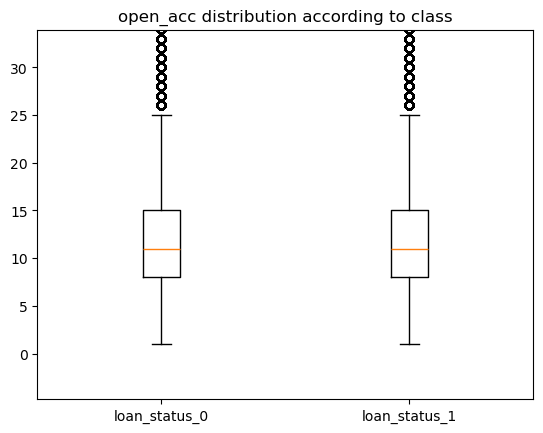

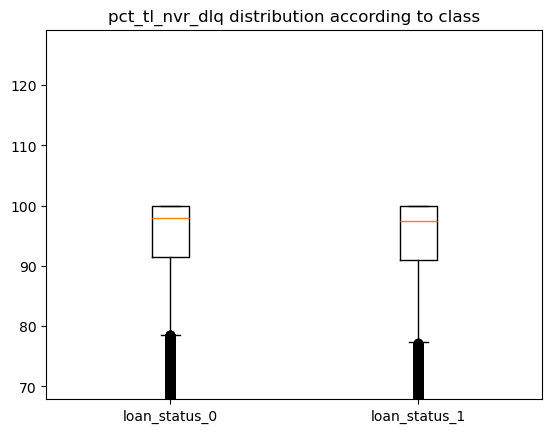

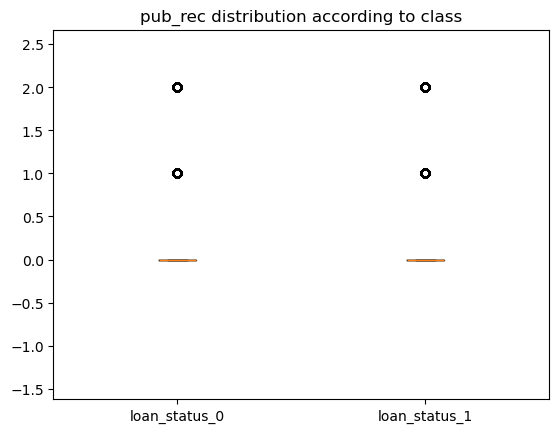

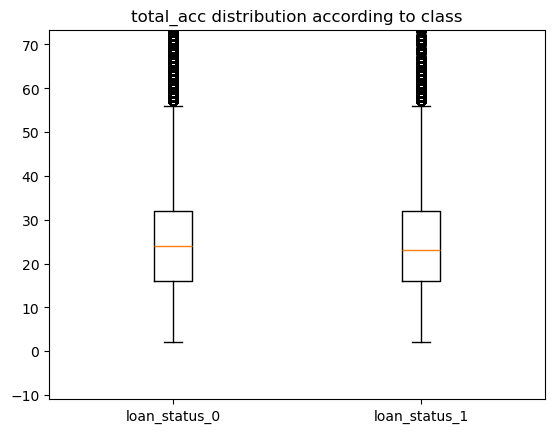

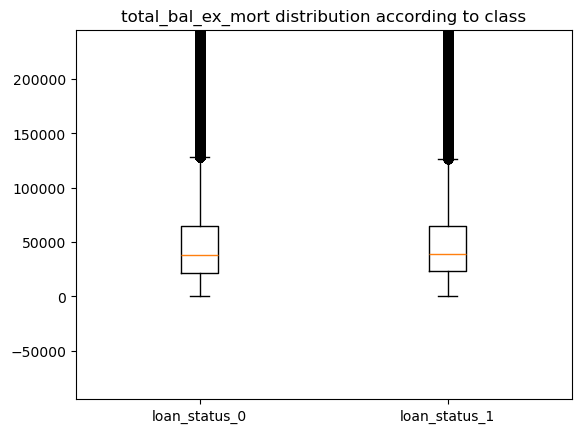

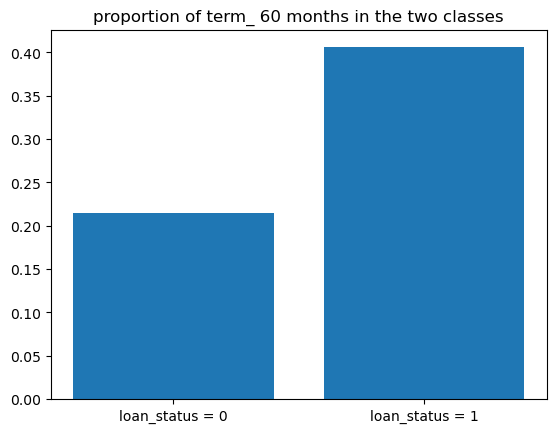

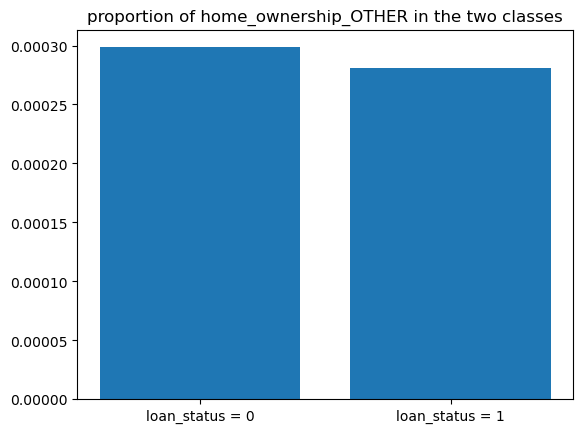

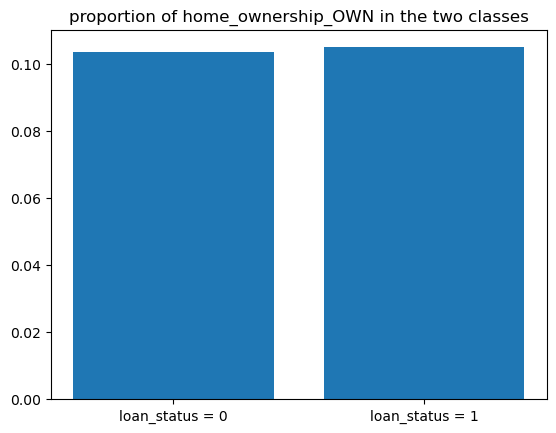

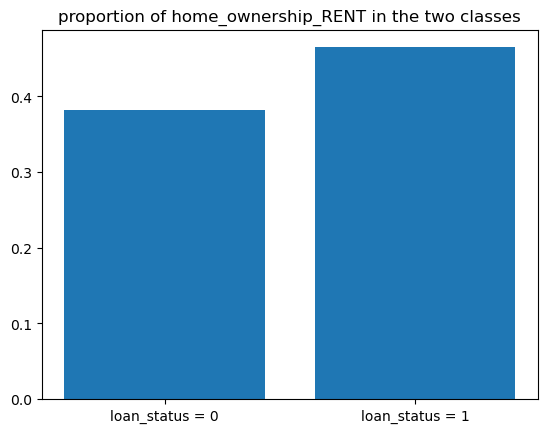

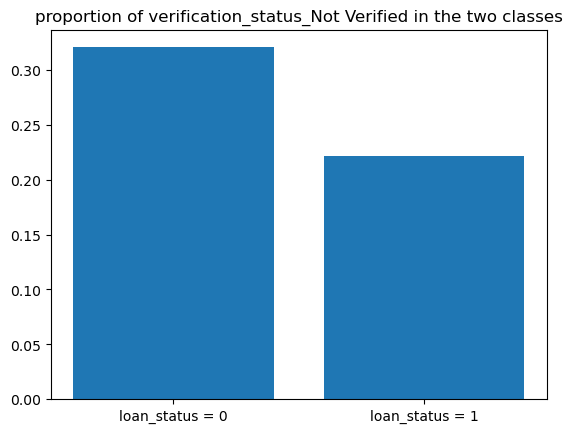

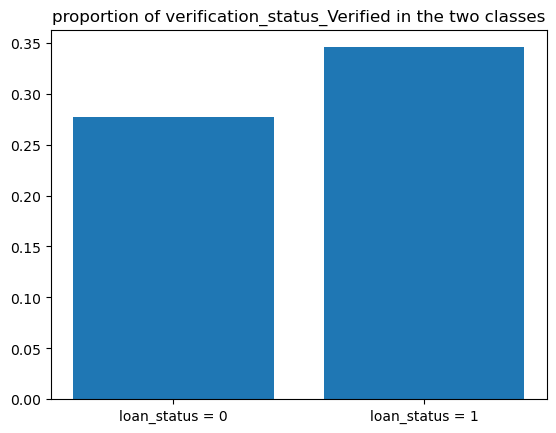

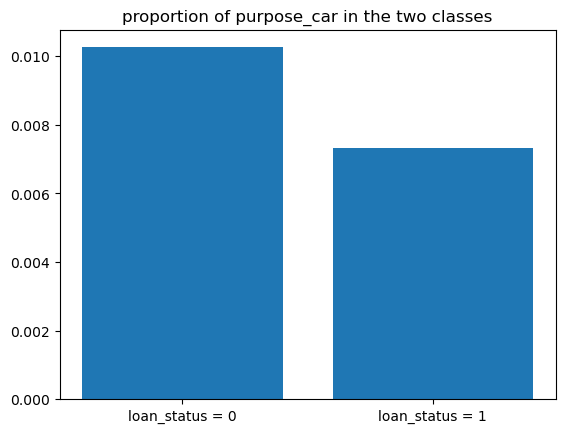

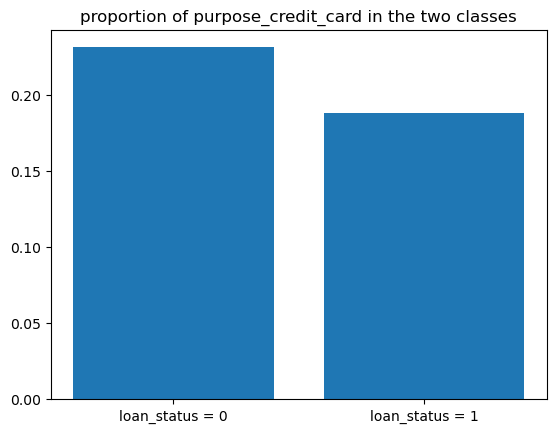

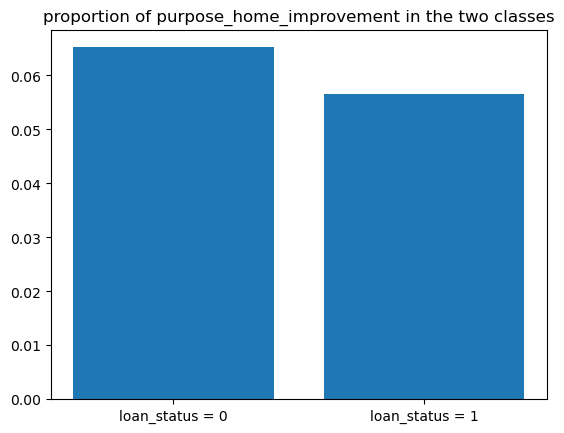

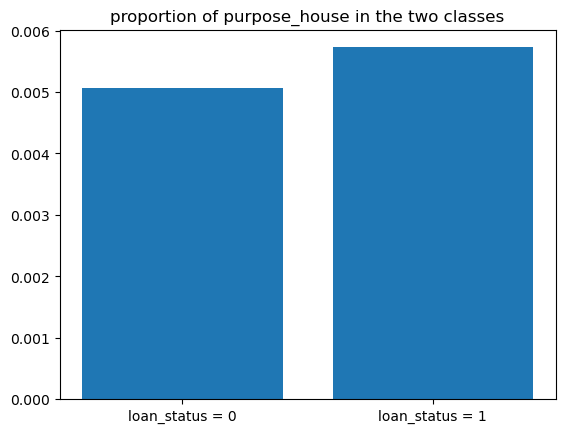

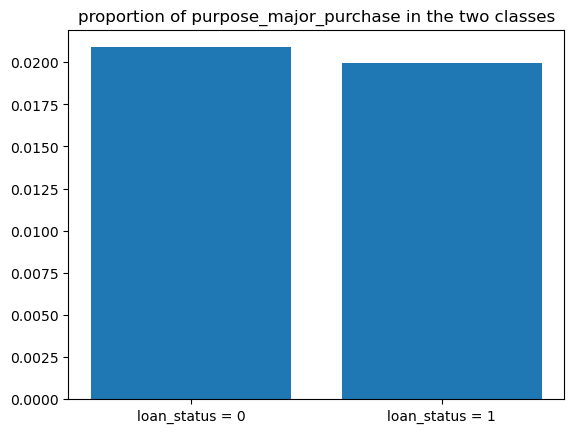

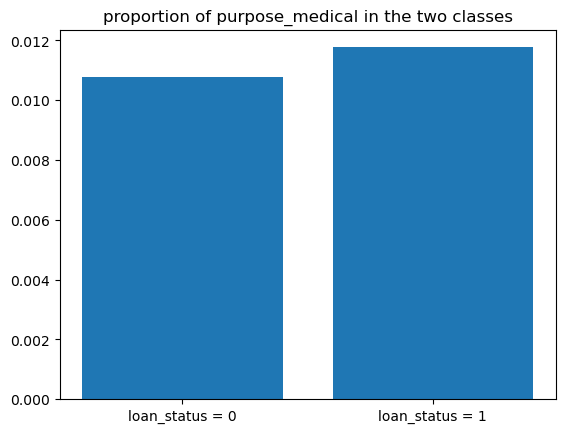

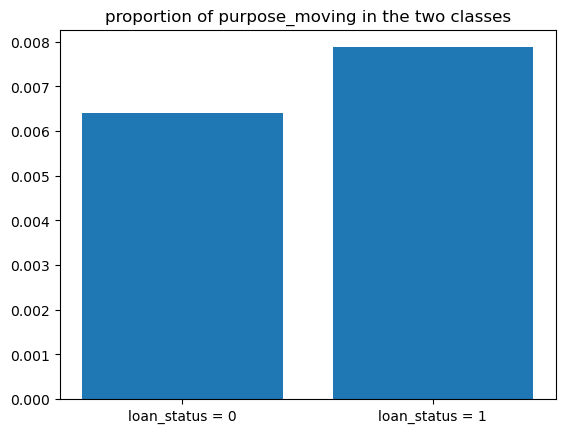

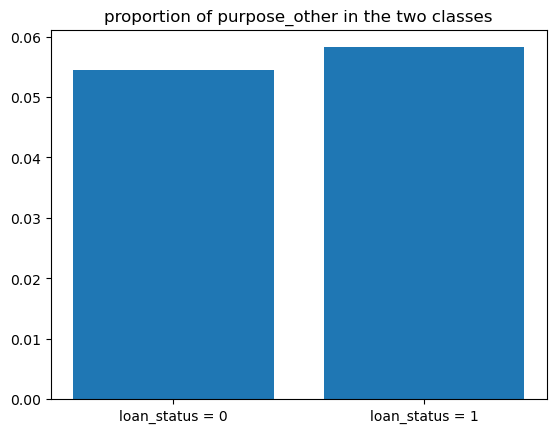

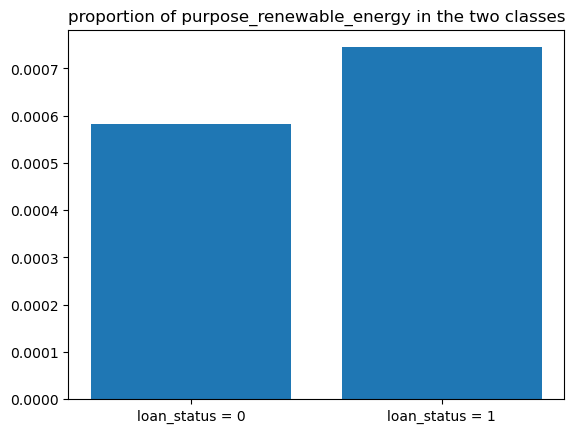

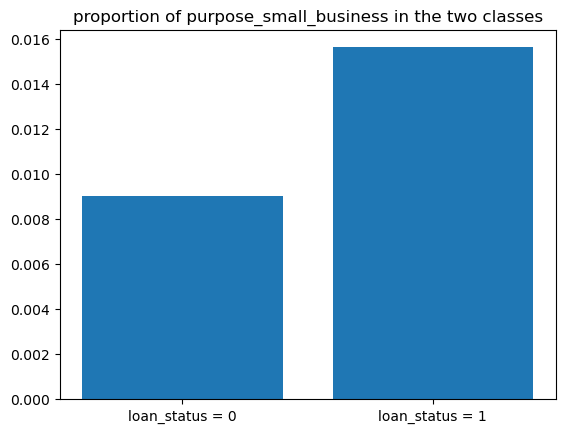

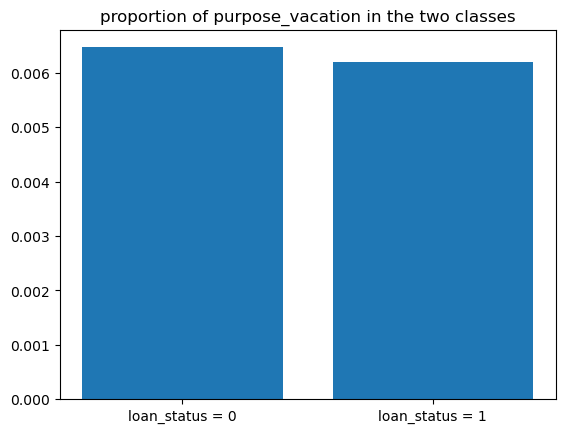

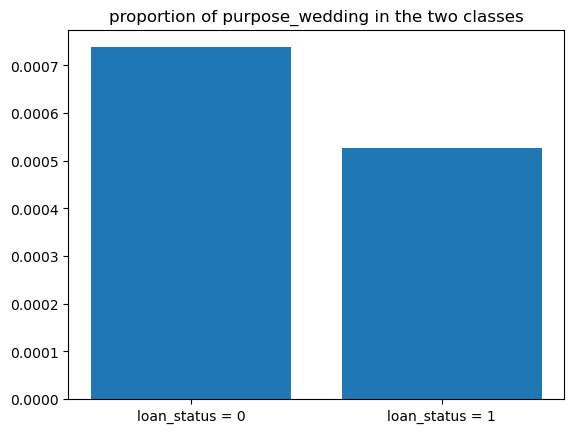

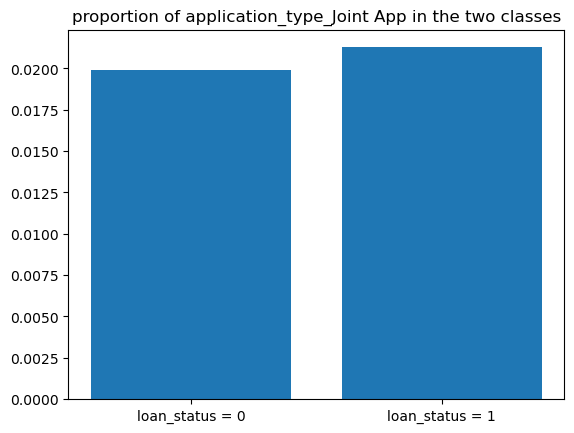

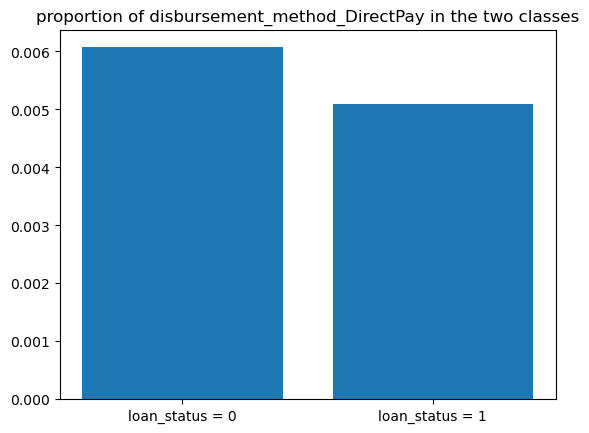

In [13]:
n_loan_status_0 = (df[df.loan_status == 0]).shape[0]
n_loan_status_1 = (df[df.loan_status == 1]).shape[0]
for var_name in df.columns:
    if df[var_name].value_counts().size == 2:
        fig, ax = plt.subplots()
        ax.bar(x = ("loan_status = 0","loan_status = 1"), height=(df[df.loan_status == 0][var_name].sum()/n_loan_status_0,df[df.loan_status == 1][var_name].sum()/n_loan_status_1))
        ax.set_title("proportion of "+var_name +" in the two classes")
    else:
        fig, ax = plt.subplots()
        ax.boxplot([df[var_name][df.loan_status == 0],df[var_name][df.loan_status == 1]])
        ax.set_ylim((df[var_name].mean() - 3*df[var_name].std(), df[var_name].mean() + 4*df[var_name].std()))
        ax.set_title(var_name + " distribution according to class")
        ax.set_xticklabels(("loan_status_0","loan_status_1"))
        plt.show()

Splitting into training, validation, testing


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["loan_status"]), df.loan_status, test_size=0.3, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# undersampling of majority class in train dataset
status_1_idx = ((y_train[y_train == 1]).index).array
status_0_idx = ((y_train[y_train == 0]).index).array
np.random.seed(0)
sampled_idx = np.random.choice(status_0_idx, size = status_1_idx.size, replace = False)
sampled_idx = np.concatenate((sampled_idx, status_1_idx))
print(X_train.index.size)
print(sampled_idx.size)

y_train = y_train.loc[sampled_idx]
X_train = X_train.loc[sampled_idx]

512137
197440


We standardize the variables

In [15]:
train_means = X_train.mean()
train_stds = X_train.std()
X_train= (X_train-train_means)/train_stds
X_val = (X_val-train_means)/train_stds
X_test = (X_test-train_means)/train_stds

## Linear models


Logistic regression with no penalty

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [17]:
logreg_model = LogisticRegression(penalty = None,max_iter=500)
# we explicitly set the penalty to none so there is no regularization
logreg_model.fit(X_train,y_train)

LogisticRegression(max_iter=500, penalty=None)

In [18]:
logReg_yhat_val = logreg_model.predict(X_val)
logreg_phat_val = logreg_model.predict_proba(X_val)[:,1]

print("L1 norm of coefficients: ", np.abs(logreg_model.coef_).sum())
print("L2 norm of coefficients: ", (logreg_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,logReg_yhat_val))
print(classification_report(y_val,logReg_yhat_val))

print("Coefficients of unregularized model")
# Coeffs of unregularized model
(pd.Series(logreg_model.coef_[0], index = logreg_model.feature_names_in_)).sort_values()

L1 norm of coefficients:  3.148642485537606
L2 norm of coefficients:  0.8666789120409131
acc_score function from sklearn:  0.6564936472324896
              precision    recall  f1-score   support

           0       0.89      0.66      0.76    275803
           1       0.31      0.65      0.42     65623

    accuracy                           0.66    341426
   macro avg       0.60      0.65      0.59    341426
weighted avg       0.78      0.66      0.69    341426

Coefficients of unregularized model


sub_grade                          -0.728776
int_rate                           -0.327940
mort_acc                           -0.097483
annual_inc                         -0.087941
fico_range_low                     -0.079104
fico_range_high                    -0.078461
total_acc                          -0.077559
total_bal_ex_mort                  -0.059559
verification_status_Not Verified   -0.049306
mths_since_recent_bc               -0.046357
disbursement_method_DirectPay      -0.032651
application_type_Joint App         -0.031895
emp_length                         -0.027275
purpose_credit_card                -0.024223
num_bc_tl                          -0.017835
pub_rec_bankruptcies               -0.014494
mo_sin_rcnt_tl                     -0.012449
verification_status_Verified       -0.012124
purpose_car                        -0.010574
purpose_wedding                    -0.009802
pct_tl_nvr_dlq                     -0.005323
earliest_cr_line                   -0.004684
home_owner

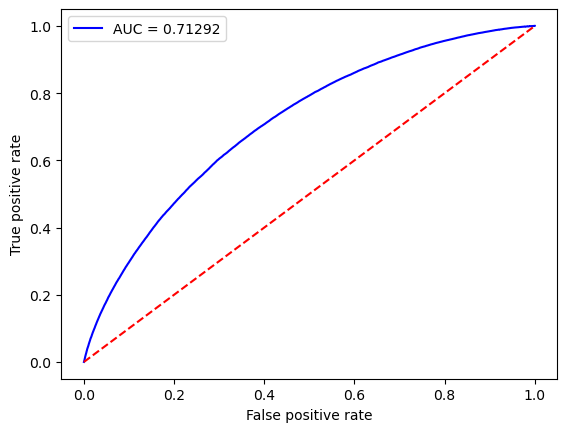

In [19]:
#Roc Curve
fpr, tpr, thresholds = roc_curve(y_val, logreg_phat_val)
logreg_auc_val = roc_auc_score(y_val, logreg_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%logreg_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

LASSO

In [20]:
from sklearn.linear_model import LogisticRegressionCV
# parameter Cs= Each of the values in Cs describes the inverse of regularization strength.
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
# Like in support vector machines, smaller values specify stronger regularization.
c_values = np.exp(np.arange(10,-1,-0.25))**-1

#parameter cv= number of folds to use in cross validation

lassocv_model = LogisticRegressionCV(penalty="l1", solver="saga", Cs = c_values, cv = 5, max_iter = 3500, n_jobs = -1,verbose = 0)
lassocv_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([4.53999298e-05, 5.82946637e-05, 7.48518299e-05, 9.61116521e-05,
       1.23409804e-04, 1.58461325e-04, 2.03468369e-04, 2.61258557e-04,
       3.35462628e-04, 4.30742541e-04, 5.53084370e-04, 7.10174389e-04,
       9.11881966e-04, 1.17087962e-03, 1.50343919e-03, 1.93045414e-03,
       2.47875218e-03, 3.18278080e-03, 4.08677144e-03, 5.24751840e-03,
       6.73794700e-03, 8.65...
       1.83156389e-02, 2.35177459e-02, 3.01973834e-02, 3.87742078e-02,
       4.97870684e-02, 6.39278612e-02, 8.20849986e-02, 1.05399225e-01,
       1.35335283e-01, 1.73773943e-01, 2.23130160e-01, 2.86504797e-01,
       3.67879441e-01, 4.72366553e-01, 6.06530660e-01, 7.78800783e-01,
       1.00000000e+00, 1.28402542e+00, 1.64872127e+00, 2.11700002e+00]),
                     cv=5, max_iter=3500, n_jobs=-1, penalty='l1',
                     solver='saga')

In [21]:
lassocv_yhat_val = lassocv_model.predict(X_val)
lassocv_phat_val = lassocv_model.predict_proba(X_val)[:,1]

print("num of coefs that have been shrunk to 0: ", (lassocv_model.coef_ == 0).sum())
print("L1 norm of coefficients: ", np.abs(lassocv_model.coef_).sum())
print("L2 norm of coefficients: ", (lassocv_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,lassocv_yhat_val))
print(classification_report(y_val,lassocv_yhat_val))
print("Coefficients of LASSO model")
(pd.Series(lassocv_model.coef_[0], index = lassocv_model.feature_names_in_)).sort_values()

num of coefs that have been shrunk to 0:  2
L1 norm of coefficients:  3.004989838986224
L2 norm of coefficients:  0.7733238848000339
acc_score function from sklearn:  0.6566078740341977
              precision    recall  f1-score   support

           0       0.89      0.66      0.76    275803
           1       0.31      0.65      0.42     65623

    accuracy                           0.66    341426
   macro avg       0.60      0.65      0.59    341426
weighted avg       0.78      0.66      0.69    341426

Coefficients of LASSO model


sub_grade                          -0.687272
int_rate                           -0.290377
mort_acc                           -0.097702
annual_inc                         -0.084907
fico_range_low                     -0.081402
fico_range_high                    -0.075911
total_acc                          -0.075665
total_bal_ex_mort                  -0.058211
verification_status_Not Verified   -0.048979
mths_since_recent_bc               -0.045717
disbursement_method_DirectPay      -0.031964
application_type_Joint App         -0.031320
emp_length                         -0.026322
purpose_credit_card                -0.023832
num_bc_tl                          -0.016249
mo_sin_rcnt_tl                     -0.012000
verification_status_Verified       -0.011159
pub_rec_bankruptcies               -0.010103
purpose_car                        -0.010027
purpose_wedding                    -0.009235
pct_tl_nvr_dlq                     -0.004999
earliest_cr_line                   -0.002942
home_owner

33.11545195869231 	 this is the optimal lambda parameter


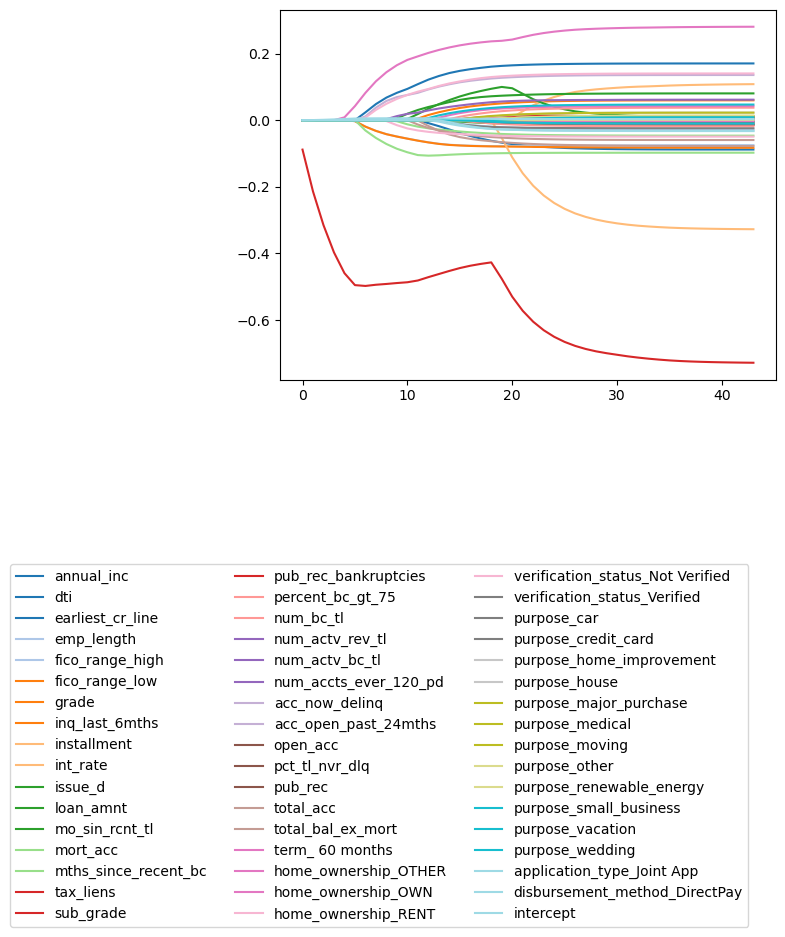

In [22]:
print((lassocv_model.C_**-1)[0],"\t this is the optimal lambda parameter")
col_names = list(lassocv_model.feature_names_in_)
pd.DataFrame(lassocv_model.coefs_paths_[1].mean(axis=0),columns=col_names+["intercept"]).plot(linewidth=1.5,colormap="tab20")
plt.legend(loc='lower center', bbox_to_anchor=(0.2, -1.5),ncols=3)

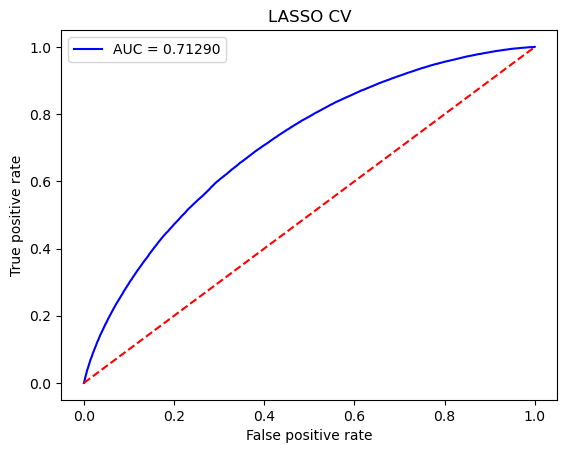

In [23]:
fpr, tpr, thresholds = roc_curve(y_val, lassocv_phat_val)
lassocv_auc_val = roc_auc_score(y_val, lassocv_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%lassocv_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("LASSO CV")
plt.show()

Ridge

In [24]:
from sklearn.linear_model import LogisticRegressionCV
# parameter Cs= Each of the values in Cs describes the inverse of regularization strength.
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
# Like in support vector machines, smaller values specify stronger regularization.

#parameter cv= number of folds to use in cross validation

ridgecv_model = LogisticRegressionCV(penalty="l2", solver="saga", Cs = c_values, cv = 5, max_iter = 3500, n_jobs = -1,verbose = 0)
ridgecv_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([4.53999298e-05, 5.82946637e-05, 7.48518299e-05, 9.61116521e-05,
       1.23409804e-04, 1.58461325e-04, 2.03468369e-04, 2.61258557e-04,
       3.35462628e-04, 4.30742541e-04, 5.53084370e-04, 7.10174389e-04,
       9.11881966e-04, 1.17087962e-03, 1.50343919e-03, 1.93045414e-03,
       2.47875218e-03, 3.18278080e-03, 4.08677144e-03, 5.24751840e-03,
       6.73794700e-03, 8.65...e-02,
       1.83156389e-02, 2.35177459e-02, 3.01973834e-02, 3.87742078e-02,
       4.97870684e-02, 6.39278612e-02, 8.20849986e-02, 1.05399225e-01,
       1.35335283e-01, 1.73773943e-01, 2.23130160e-01, 2.86504797e-01,
       3.67879441e-01, 4.72366553e-01, 6.06530660e-01, 7.78800783e-01,
       1.00000000e+00, 1.28402542e+00, 1.64872127e+00, 2.11700002e+00]),
                     cv=5, max_iter=3500, n_jobs=-1, solver='saga')

In [25]:
ridgecv_yhat_val = ridgecv_model.predict(X_val)
ridgecv_phat_val = ridgecv_model.predict_proba(X_val)[:,1]

print("num of coefs that have been shrunk to 0: ", (ridgecv_model.coef_ == 0).sum())
print("L1 norm of coefficients: ", np.abs(ridgecv_model.coef_).sum())
print("L2 norm of coefficients: ", (ridgecv_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,ridgecv_yhat_val))
print(classification_report(y_val,ridgecv_yhat_val))

print("Coefficients of Ridge")
(pd.Series(ridgecv_model.coef_[0], index = ridgecv_model.feature_names_in_)).sort_values()



num of coefs that have been shrunk to 0:  0
L1 norm of coefficients:  2.942741023633064
L2 norm of coefficients:  0.6135338481637249
acc_score function from sklearn:  0.6564292116007568
              precision    recall  f1-score   support

           0       0.89      0.66      0.76    275803
           1       0.31      0.65      0.42     65623

    accuracy                           0.66    341426
   macro avg       0.60      0.65      0.59    341426
weighted avg       0.78      0.66      0.69    341426

Coefficients of Ridge


sub_grade                          -0.583690
int_rate                           -0.232610
mort_acc                           -0.097668
annual_inc                         -0.088330
fico_range_low                     -0.079889
fico_range_high                    -0.079435
total_acc                          -0.076276
total_bal_ex_mort                  -0.059412
verification_status_Not Verified   -0.050791
mths_since_recent_bc               -0.046469
grade                              -0.043686
application_type_Joint App         -0.033270
disbursement_method_DirectPay      -0.032911
emp_length                         -0.027204
purpose_credit_card                -0.024905
num_bc_tl                          -0.019172
pub_rec_bankruptcies               -0.014657
mo_sin_rcnt_tl                     -0.013228
verification_status_Verified       -0.013041
purpose_car                        -0.010620
purpose_wedding                    -0.009976
pct_tl_nvr_dlq                     -0.005632
earliest_c

190.56626845863 	 this is the optimal lambda parameter


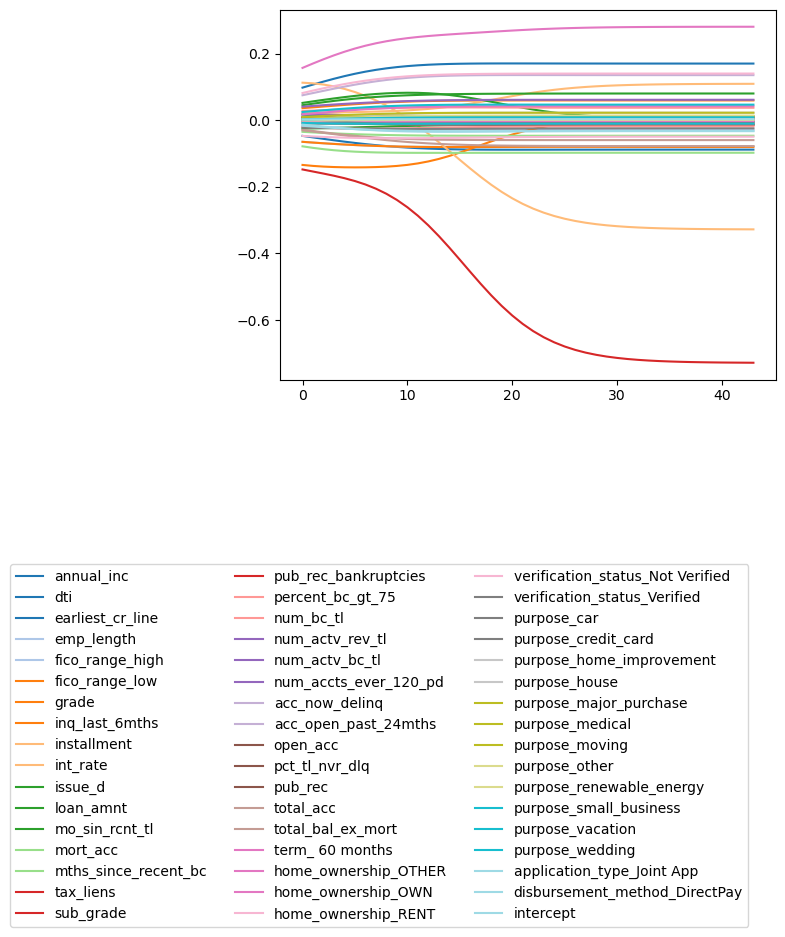

In [26]:
print((ridgecv_model.C_**-1)[0],"\t this is the optimal lambda parameter")
col_names = list(ridgecv_model.feature_names_in_)
pd.DataFrame(ridgecv_model.coefs_paths_[1].mean(axis=0),columns=col_names+["intercept"]).plot(linewidth=1.5,colormap="tab20")
plt.legend(loc='lower center', bbox_to_anchor=(0.2, -1.5),ncols=3)

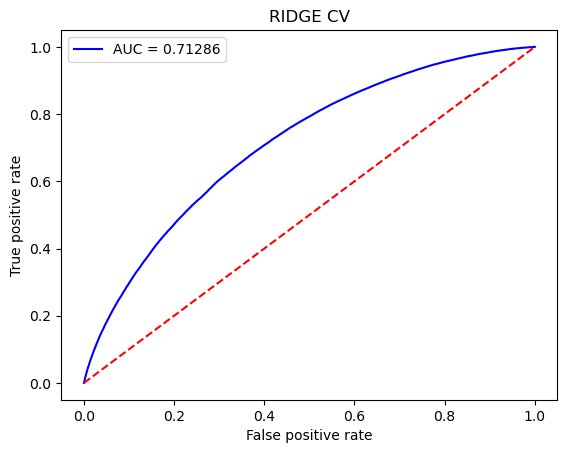

In [27]:
fpr, tpr, thresholds = roc_curve(y_val, ridgecv_phat_val)
ridgecv_auc_val = roc_auc_score(y_val, ridgecv_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%ridgecv_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("RIDGE CV")
plt.show()

Elastic net

In [28]:
from sklearn.linear_model import LogisticRegressionCV
# parameter Cs= Each of the values in Cs describes the inverse of regularization strength.
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
# Like in support vector machines, smaller values specify stronger regularization.

#parameter cv= number of folds to use in cross validation

elasticnetcv_model = LogisticRegressionCV(penalty="elasticnet", solver="saga", Cs = c_values, cv = 5, l1_ratios= [0.5], max_iter = 3500, n_jobs = -1,verbose = 1)
elasticnetcv_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


convergence after 12 epochs took 2 seconds
convergence after 12 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 12 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 12 epochs took 1 seconds
convergence after 11 epochs took 1 seconds
convergence after 11 epochs took 2 seconds
convergence after 11 epochs took 2 seconds
convergence after 11 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 13 epochs took 2 seconds
convergence after 16 epochs took 2 seconds
convergence after 16 epochs took 2 seconds
convergence after 16 epochs took 2 seconds
convergence after 16 epochs took 2 seconds
convergence after 16 epochs took 2 seconds
convergence after 19 epochs took 2 seconds
convergence after 19 epochs took 3 seconds
convergence after 19 epochs took 3 seconds
convergence

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished


LogisticRegressionCV(Cs=array([4.53999298e-05, 5.82946637e-05, 7.48518299e-05, 9.61116521e-05,
       1.23409804e-04, 1.58461325e-04, 2.03468369e-04, 2.61258557e-04,
       3.35462628e-04, 4.30742541e-04, 5.53084370e-04, 7.10174389e-04,
       9.11881966e-04, 1.17087962e-03, 1.50343919e-03, 1.93045414e-03,
       2.47875218e-03, 3.18278080e-03, 4.08677144e-03, 5.24751840e-03,
       6.73794700e-03, 8.65...
       1.83156389e-02, 2.35177459e-02, 3.01973834e-02, 3.87742078e-02,
       4.97870684e-02, 6.39278612e-02, 8.20849986e-02, 1.05399225e-01,
       1.35335283e-01, 1.73773943e-01, 2.23130160e-01, 2.86504797e-01,
       3.67879441e-01, 4.72366553e-01, 6.06530660e-01, 7.78800783e-01,
       1.00000000e+00, 1.28402542e+00, 1.64872127e+00, 2.11700002e+00]),
                     cv=5, l1_ratios=[0.5], max_iter=3500, n_jobs=-1,
                     penalty='elasticnet', solver='saga', verbose=1)

In [29]:
elasticnetcv_yhat_val = elasticnetcv_model.predict(X_val)
elasticnetcv_phat_val = elasticnetcv_model.predict_proba(X_val)[:,1]
print("num of coefs that have been shrunk to 0: ", (elasticnetcv_model.coef_ == 0).sum())
print("L1 norm of coefficients: ", np.abs(elasticnetcv_model.coef_).sum())
print("L2 norm of coefficients: ", (elasticnetcv_model.coef_**2).sum())
print("acc_score function from sklearn: ", accuracy_score(y_val,elasticnetcv_yhat_val))
print(classification_report(y_val,elasticnetcv_yhat_val))

print("coefficients of Elastic net")
(pd.Series(elasticnetcv_model.coef_[0], index = elasticnetcv_model.feature_names_in_)).sort_values()


num of coefs that have been shrunk to 0:  2
L1 norm of coefficients:  2.993951123447152
L2 norm of coefficients:  0.7526750650127746
acc_score function from sklearn:  0.6566400918500641
              precision    recall  f1-score   support

           0       0.89      0.66      0.76    275803
           1       0.31      0.65      0.42     65623

    accuracy                           0.66    341426
   macro avg       0.60      0.65      0.59    341426
weighted avg       0.78      0.66      0.69    341426

coefficients of Elastic net


sub_grade                          -0.676536
int_rate                           -0.280139
mort_acc                           -0.097716
annual_inc                         -0.085541
fico_range_low                     -0.079713
fico_range_high                    -0.077947
total_acc                          -0.075693
total_bal_ex_mort                  -0.058411
verification_status_Not Verified   -0.049246
mths_since_recent_bc               -0.045858
disbursement_method_DirectPay      -0.032129
application_type_Joint App         -0.031687
emp_length                         -0.026484
purpose_credit_card                -0.024027
num_bc_tl                          -0.016776
mo_sin_rcnt_tl                     -0.012196
verification_status_Verified       -0.011530
pub_rec_bankruptcies               -0.010962
purpose_car                        -0.010126
purpose_wedding                    -0.009365
pct_tl_nvr_dlq                     -0.005114
earliest_cr_line                   -0.003185
home_owner

54.598150033144236 	 this is the optimal lambda parameter


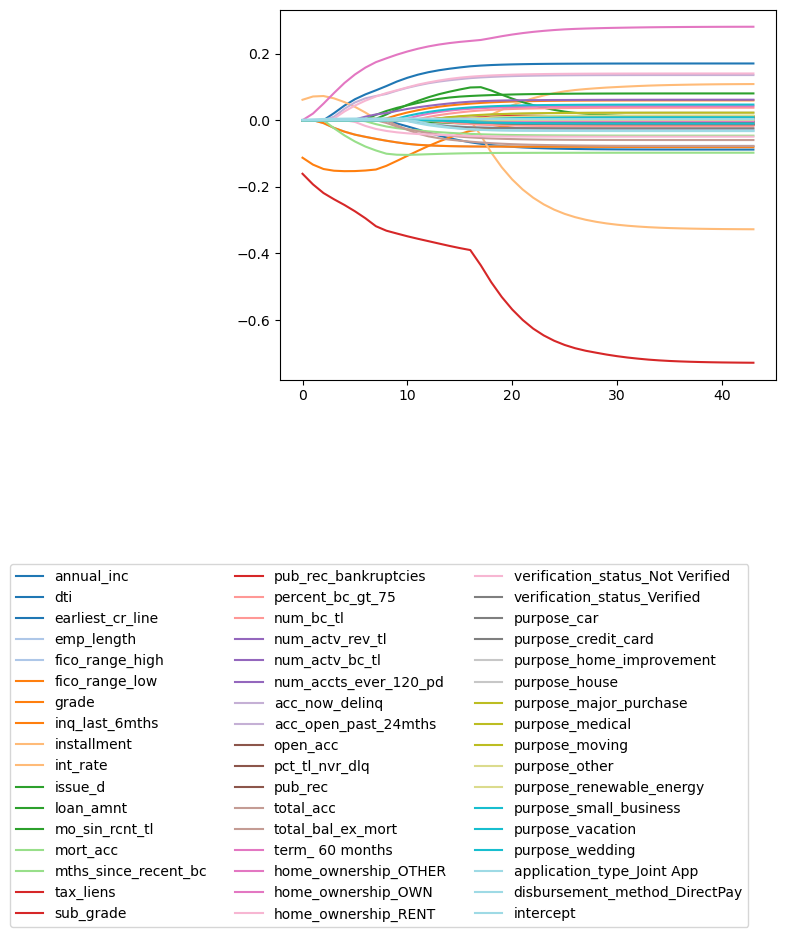

In [30]:
print((elasticnetcv_model.C_**-1)[0],"\t this is the optimal lambda parameter")
col_names = list(elasticnetcv_model.feature_names_in_)
pd.DataFrame(elasticnetcv_model.coefs_paths_[1][:,:,0,:].mean(axis=0),columns=col_names+["intercept"]).plot(linewidth=1.5,colormap="tab20")
plt.legend(loc='lower center', bbox_to_anchor=(0.2, -1.5),ncols=3)

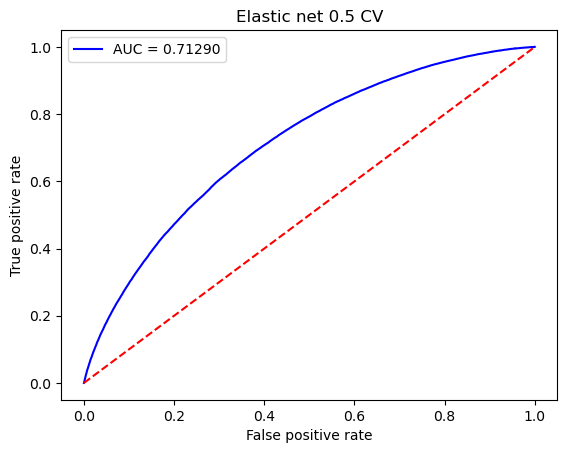

In [31]:
fpr, tpr, thresholds = roc_curve(y_val, elasticnetcv_phat_val)
elasticnetcv_auc_val = roc_auc_score(y_val, elasticnetcv_phat_val)
plt.plot(fpr,tpr, "b", label = "AUC = %0.5f"%elasticnetcv_auc_val)
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Elastic net 0.5 CV")
plt.show()